<a href="https://colab.research.google.com/github/KdrDrn-C8301Sam/01-DAwPy-NumPy/blob/main/01_01_Preparing_The_Data_For_Analysis(Student_C8301_Sam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing The Data For Analyses

## Examining the dataset

You'll be analyzing a dataset of traffic stops in Rhode Island that was collected by the Stanford Open Policing Project.

Before beginning your analysis, it's important that you familiarize yourself with the dataset. You'll read the dataset into pandas, examine the first few rows, and then count the number of missing values.

**INSTRUCTIONS**

*   Import related libraries with their alias.
*   Read the file RI_cleaned.csv into a DataFrame named ``ri``
*   Examine the first 5 rows of the ``DataFrame`` (known as the ``"head"``).
*   Examine the last 5 rows of the ``DataFrame`` (known as the ``"tail"``).
*   Examine the ``DataFrame``'s ``"columns"``.
*   Count the number of missing values in each column: Use ``.isnull()`` to check which ``DataFrame`` elements are missing, and then take the ``.sum()`` to count the number of ``True`` values in each column.

A good data analytics project is all about asking questions. After examining and questioning on the basis of all variables, we will answer the following questions:

- Do men or women speed more often?
- Does gender affect who gets searched during a stop?
- During a search, how often is the driver frisked?
- Which year had the least number of stops?
- How does drug activity change by time of day?
- Do most stops occur at night?

In [493]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime
import plotly.express as px



import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (12, 8)
pd.set_option('display.max_columns', None)
sns.set_theme(font_scale=1.2, style="whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)


**Since the dataset has 509681 rows, you can work with the first 50000 rows if you wish.**

In [494]:
df_police = pd.read_csv("RI_cleaned.csv")
ri= df_police

In [495]:
ri.sample(10)

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
446604,RI-2014-34809,RI,2014-08-28,07:35,Zone K3,NaN,NaN,NaN,200,M,1958.00,56.00,W,White,Seatbelt Violation,Seat belt,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
272008,RI-2011-11521,RI,2011-04-16,09:50,Zone K3,NaN,NaN,NaN,300,F,1973.00,38.00,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
482816,RI-2015-20211,RI,2015-06-21,17:16,Zone X3,NaN,NaN,NaN,900,F,1996.00,19.00,W,White,Other Traffic Violation,Moving violation,False,NaN,NaN,False,Warning,False,0-15 Min,False,False,Zone X3
416569,RI-2014-04774,RI,2014-02-02,00:48,Zone X4,NaN,NaN,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X4
323164,RI-2012-16883,RI,2012-03-21,20:35,Zone X4,NaN,NaN,NaN,500,M,1973.00,39.00,B,Black,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
386113,RI-2013-19004,RI,2013-06-04,02:01,Zone K3,NaN,NaN,NaN,300,M,1954.00,59.00,W,White,Other Traffic Violation,Moving violation,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
111590,RI-2007-39169,RI,2007-09-15,22:43,Zone K3,NaN,NaN,NaN,300,M,1974.00,33.00,H,Hispanic,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
217368,RI-2009-42725,RI,2009-12-23,12:00,Zone K2,NaN,NaN,NaN,900,F,1987.00,22.00,W,White,Other Traffic Violation,Moving violation,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone K2
312369,RI-2012-06088,RI,2012-01-31,06:53,Zone X4,NaN,NaN,NaN,500,F,1978.00,34.00,W,White,Other Traffic Violation,Moving violation,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
273312,RI-2011-12825,RI,2011-04-28,14:27,Zone K2,NaN,NaN,NaN,900,M,1969.00,42.00,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,30+ Min,False,False,Zone K2


In [496]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509681 entries, 0 to 509680
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     509681 non-null  object 
 1   state                  509681 non-null  object 
 2   stop_date              509671 non-null  object 
 3   stop_time              509671 non-null  object 
 4   location_raw           509681 non-null  object 
 5   county_name            0 non-null       float64
 6   county_fips            0 non-null       float64
 7   fine_grained_location  0 non-null       float64
 8   police_department      509671 non-null  object 
 9   driver_gender          480584 non-null  object 
 10  driver_age_raw         480632 non-null  float64
 11  driver_age             478986 non-null  float64
 12  driver_race_raw        480608 non-null  object 
 13  driver_race            480608 non-null  object 
 14  violation_raw          480608 non-nu

In [497]:
ri.isnull().sum()

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

In [498]:
ri.describe(exclude="object")   

,county_name,county_fips,fine_grained_location,driver_age_raw,driver_age,contraband_found,drugs_related_stop
count,0.00,0.00,0.00,480632.00,478986.00,509681,509681
unique,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,False,False
freq,NaN,NaN,NaN,NaN,NaN,503102,504916
mean,NaN,NaN,NaN,1970.51,33.98,NaN,NaN
std,NaN,NaN,NaN,108.19,12.70,NaN,NaN
min,NaN,NaN,NaN,0.00,15.00,NaN,NaN
25%,NaN,NaN,NaN,1967.00,23.00,NaN,NaN
50%,NaN,NaN,NaN,1980.00,31.00,NaN,NaN
75%,NaN,NaN,NaN,1987.00,43.00,NaN,NaN


In [499]:
ri.describe(include="object").T

,count,unique,top,freq
id,509681,509681,RI-2005-00001,1
state,509681,1,RI,509681
stop_date,509671,3809,2006-05-21,302
stop_time,509671,1440,10:00,1763
location_raw,509681,7,Zone X4,135349
police_department,509671,73,500,113927
driver_gender,480584,2,M,349446
driver_race_raw,480608,7,W,344734
driver_race,480608,5,White,344734
violation_raw,480608,12,Speeding,268744


In [500]:
for col in ri.select_dtypes(include="object").columns:
    print(col)
    print("--"*8)
    print(ri[col].value_counts(dropna=False))
    print("--"*8)
    print(ri[col].dtype)
    print("/\\"*30)

id
----------------
RI-2005-00001    1
RI-2012-33502    1
RI-2012-33515    1
RI-2012-33514    1
RI-2012-33513    1
                ..
RI-2008-44265    1
RI-2008-44264    1
RI-2008-44263    1
RI-2008-44262    1
RI-NA-10         1
Name: id, Length: 509681, dtype: int64
----------------
object
/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
state
----------------
RI    509681
Name: state, dtype: int64
----------------
object
/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
stop_date
----------------
2015-09-05    302
2006-05-21    302
2006-06-13    293
2012-01-08    292
2005-11-05    290
             ... 
2005-06-04      1
2005-05-21      1
2005-05-11      1
2005-04-24      1
2005-07-28      1
Name: stop_date, Length: 3810, dtype: int64
----------------
object
/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
stop_time
----------------
10:00    1763
11:00    1759
09:00    1644
10:30    1625
09:30    1489
         ... 
04:52       8
05:21       8
05:39  

## Dropping columns

Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the ``DataFrame``, to make it easier for you to focus on the remaining columns.

You'll drop the ``county_name`` column because it only contains missing values, and you'll drop the ``state`` column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information.

**INSTRUCTIONS**

*   Examine the ``DataFrame``'s shape to find out the number of rows and columns.

*   Drop the columns that almost consist of missing values. 

*   Examine the ``.shape`` again to verify that there are now two fewer columns.

In [501]:
ri.drop(columns=["county_fips","county_name","fine_grained_location"], inplace=True)
#There is no information abaout these columns. All of the values are NaN
ri.drop(columns="state",inplace=True)
#All of the events are in Rhode Island. So there is no need to this column.

In [502]:
ri.shape

(509681, 22)

***

## Dropping rows

When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

During this course, the ``driver_gender`` column will be critical to many of your analyses. Because only a small fraction of rows are missing ``driver_gender``, we'll drop those rows from the dataset.

**INSTRUCTIONS**

*   Count the number of missing values in each column.

*   Drop all rows that are missing ``driver_gender`` by passing the column name to the subset parameter of ``.dropna()``.
*   Count the number of missing values in each column again, to verify that none of the remaining rows are missing ``driver_gender``.
*   Examine the ``DataFrame``'s ``.shape`` to see how many rows and columns remain.

In [503]:
ri.duplicated().value_counts()

False    509681
dtype: int64

In [504]:
ri.isnull().sum()

id                         0
stop_date                 10
stop_time                 10
location_raw               0
police_department         10
driver_gender          29097
driver_age_raw         29049
driver_age             30695
driver_race_raw        29073
driver_race            29073
violation_raw          29073
violation              29073
search_conducted          10
search_type_raw       491919
search_type           491919
contraband_found           0
stop_outcome           29073
is_arrested            29073
stop_duration          29073
out_of_state           29881
drugs_related_stop         0
district                   0
dtype: int64

In [505]:
drop_index = ri[(ri["driver_race_raw"].isnull()) & (ri["driver_race"].isnull()) & (ri["violation_raw"].isnull()) & 
   (ri["stop_outcome"].isnull()) & (ri["is_arrested"].isnull()) & (ri["stop_duration"].isnull())].index
drop_index

Int64Index([     2,     17,     35,     74,     75,     80,     85,     86,
                87,     90,
            ...
            509671, 509672, 509673, 509674, 509675, 509676, 509677, 509678,
            509679, 509680],
           dtype='int64', length=29073)

In [506]:
ri.drop(labels=drop_index, inplace=True)
ri.shape

(480608, 22)

In [507]:
ri.isnull().sum()

id                         0
stop_date                  0
stop_time                  0
location_raw               0
police_department          0
driver_gender             24
driver_age_raw             1
driver_age              1640
driver_race_raw            0
driver_race                0
violation_raw              0
violation                  0
search_conducted           0
search_type_raw       462846
search_type           462846
contraband_found           0
stop_outcome               0
is_arrested                0
stop_duration              0
out_of_state             808
drugs_related_stop         0
district                   0
dtype: int64

***

## Fixing a data type

We know that the ``is_arrested`` column currently has the ``object`` data type. In this exercise, we'll change the data type to ``bool``, which is the most suitable type for a column containing ``True`` and ``False`` values.

Fixing the data type will enable us to use mathematical operations on the ``is_arrested`` column that would not be possible otherwise.

**INSTRUCTIONS**

*   Examine the values of the ``is_arrested`` column to verify that it contains ``True`` and ``False`` values.
*   Check the current data type of ``is_arrested``.
*   Use the ``.astype()`` method to convert ``is_arrested`` to a ``bool`` column.
*   Check the new data type of ``is_arrested``, to confirm that it is now a ``bool`` column.

In [508]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.00,20.00,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.00,18.00,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
3,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.00,19.00,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.00,27.00,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
5,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.00,32.00,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [509]:
ri["id"] = ri["id"].str.extract("\.*RI-(\d+-\d+)")

In [510]:
ri["stop_time"] = pd.to_datetime((ri["stop_date"] + " " +ri["stop_time"]))
ri["stop_date"] = pd.to_datetime(ri["stop_date"])
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,2005-00001,2005-01-02,2005-01-02 01:55:00,Zone K1,600,M,1985.00,20.00,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,2005-00002,2005-01-02,2005-01-02 20:30:00,Zone X4,500,M,1987.00,18.00,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
3,2005-00004,2005-01-04,2005-01-04 12:55:00,Zone X4,500,M,1986.00,19.00,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,2005-00005,2005-01-06,2005-01-06 01:30:00,Zone X4,500,M,1978.00,27.00,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
5,2005-00006,2005-01-12,2005-01-12 08:05:00,Zone X1,0,M,1973.00,32.00,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [511]:
ri["is_arrested"] = ri["is_arrested"].astype(bool)
#is arrested column type changed to boolean

In [512]:
ri.drop(columns="location_raw", inplace=True)
# district column and location_raw column is same. So location_raw column dropped

In [513]:
ri[~((ri.stop_date.dt.year - ri.driver_age_raw) == ri.driver_age)]["driver_age_raw"].value_counts()

0.00       1399
2006.00      40
2005.00      32
2007.00      19
2004.00      15
2000.00      11
2003.00      11
2001.00       9
2002.00       8
2008.00       7
2009.00       6
1998.00       6
2011.00       6
2010.00       6
2012.00       5
1997.00       4
1999.00       4
1889.00       3
2013.00       3
1886.00       2
977.00        2
2015.00       2
1866.00       2
1995.00       2
1888.00       2
1996.00       2
1992.00       2
1887.00       2
8801.00       1
2919.00       1
1885.00       1
2014.00       1
1811.00       1
2019.00       1
1884.00       1
1864.00       1
1782.00       1
609.00        1
219.00        1
1859.00       1
268.00        1
1845.00       1
1877.00       1
1869.00       1
1901.00       1
497.00        1
1036.00       1
107.00        1
160.00        1
1880.00       1
338.00        1
1890.00       1
234.00        1
1993.00       1
1915.00       1
Name: driver_age_raw, dtype: int64

In [514]:
age_index = ri[(ri["driver_age_raw"] == 0) | (ri["driver_age_raw"] > 1995) | (ri["driver_age_raw"] < 1900)].index
ri.loc[age_index,"driver_age_raw"] = np.nan
ri["driver_age"] = (ri.stop_date.dt.year - ri.driver_age_raw)
ri.drop(columns = "driver_age_raw", inplace=True)
#driver_Age_raw controlled, and dropped after driver age equal to stopdate year - driver_age_raw

In [515]:
ri.groupby("driver_race_raw")["driver_race"].value_counts()

driver_race_raw  driver_race
B                Black           68579
H                Hispanic        44048
I                Asian           12826
L                Hispanic         9077
N                Other             530
O                Other             814
W                White          344734
Name: driver_race, dtype: int64

In [516]:
ri.drop(columns="driver_race_raw", inplace=True)
# driver_race_raw column and driver_race columns are (in general) same. So driver_race_raw column dropped

In [517]:
ri.stop_duration.value_counts()

0-15 Min     386665
16-30 Min     76323
30+ Min       17614
1                 5
2                 1
Name: stop_duration, dtype: int64

In [518]:
ri.loc[ri[(ri.stop_duration == "1") | (ri.stop_duration == "2")].index,"stop_duration"] = ri.stop_duration.mode()[0]
ri.stop_duration.value_counts()

0-15 Min     386671
16-30 Min     76323
30+ Min       17614
Name: stop_duration, dtype: int64

In [519]:
ri.head()

,id,stop_date,stop_time,police_department,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,2005-00001,2005-01-02,2005-01-02 01:55:00,600,M,20.00,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,2005-00002,2005-01-02,2005-01-02 20:30:00,500,M,18.00,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
3,2005-00004,2005-01-04,2005-01-04 12:55:00,500,M,19.00,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,2005-00005,2005-01-06,2005-01-06 01:30:00,500,M,27.00,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
5,2005-00006,2005-01-12,2005-01-12 08:05:00,0,M,32.00,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [520]:
ri.shape

(480608, 19)

In [521]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480608 entries, 0 to 509670
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  480608 non-null  object        
 1   stop_date           480608 non-null  datetime64[ns]
 2   stop_time           480608 non-null  datetime64[ns]
 3   police_department   480608 non-null  object        
 4   driver_gender       480584 non-null  object        
 5   driver_age          475234 non-null  float64       
 6   driver_race         480608 non-null  object        
 7   violation_raw       480608 non-null  object        
 8   violation           480608 non-null  object        
 9   search_conducted    480608 non-null  object        
 10  search_type_raw     17762 non-null   object        
 11  search_type         17762 non-null   object        
 12  contraband_found    480608 non-null  bool          
 13  stop_outcome        480608 no

# Examining dataset according to variables

## Examining Independent Variables

### Examining Driver Gender

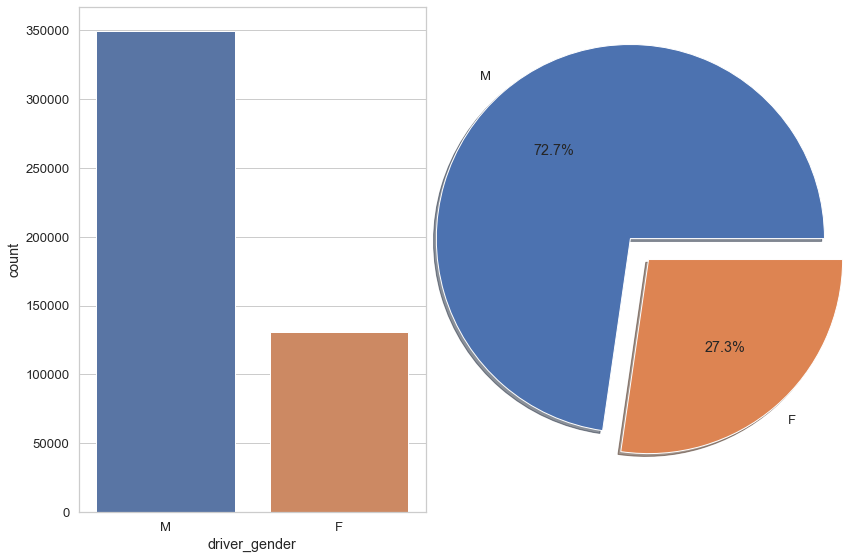

In [522]:
fig, ax = plt.subplots(1,2)
sns.countplot(x="driver_gender", data=ri, ax=ax[0])
ri.driver_gender.value_counts().plot.pie(subplots=True, explode=[0.2,0], radius=1.4, shadow=True, autopct="%.1f%%")
plt.tight_layout()

**73% of the driver_gender is male and 27% is female.**

### Examining Driver Race

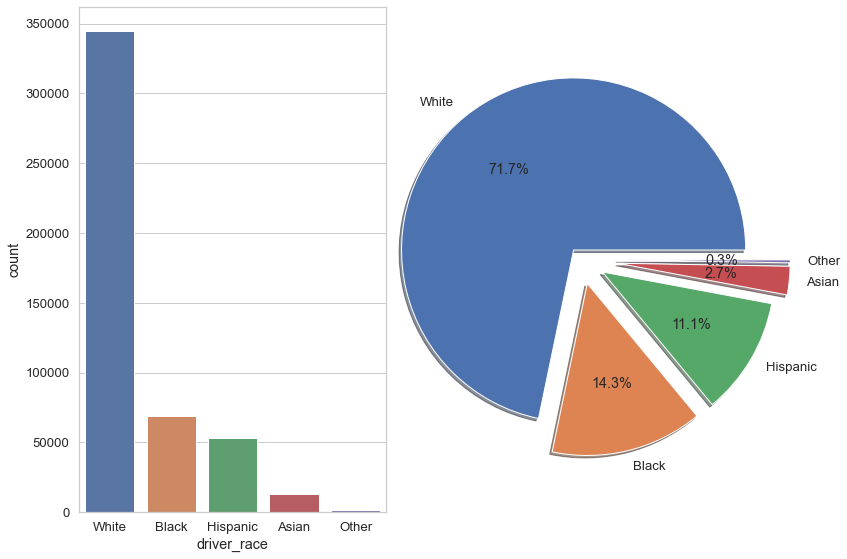

In [523]:
fig, ax = plt.subplots(1,2)
sns.countplot(x="driver_race", data=ri, ax=ax[0])
ri.driver_race.value_counts().plot.pie(subplots=True, radius=1.4, explode=[0.1,0.2,0.2,0.3,0.3], shadow=True, autopct="%.1f%%")
plt.tight_layout()

**According to driver_race variables whites are about 72% of the dataset. Blacks are in second place with about 14%.**

### Examining Driver Age

<AxesSubplot:xlabel='driver_age', ylabel='Count'>

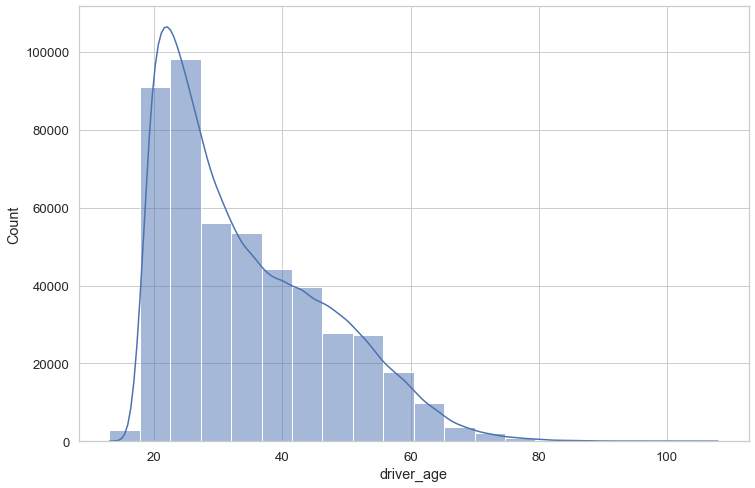

In [524]:
sns.histplot(ri.driver_age, kde=True, bins=20)

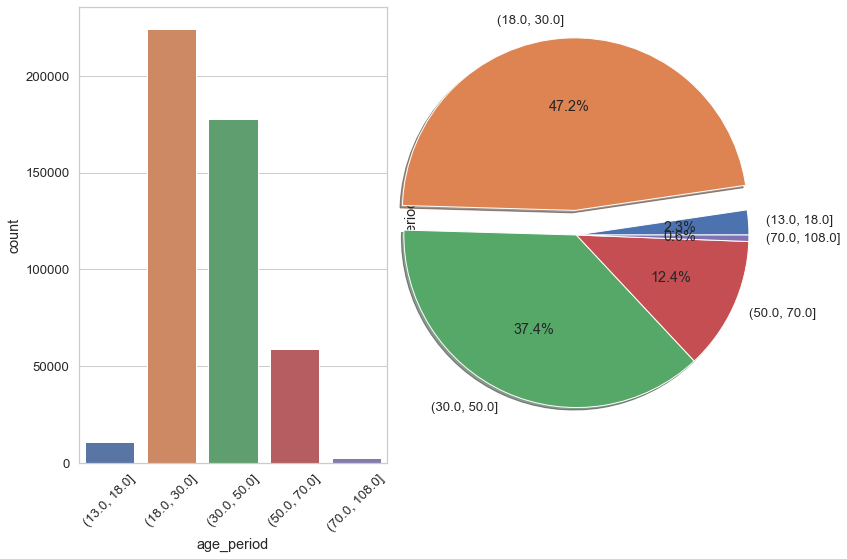

In [525]:
ri["age_period"] = pd.cut(ri.driver_age, [ri.driver_age.min(),18,30,50,70,ri.driver_age.max()])
plt.subplot(121)
sns.countplot(x="age_period", data=ri)
plt.xticks(rotation=45)
plt.subplot(122)
ri.age_period.value_counts(sort=False).plot.pie(subplots=True, radius=1.4, explode=[0,0.2,0,0,0], shadow=True, autopct="%.1f%%")
plt.tight_layout()

**The largest part of the dataset is composed of people between the ages of 18 and 30 with a rate of approximately 47%. Drivers between the ages of 30 and 50 come in second place.**

### Examining Stop Time

Text(0.5, 1.0, 'Hour Based Datas')

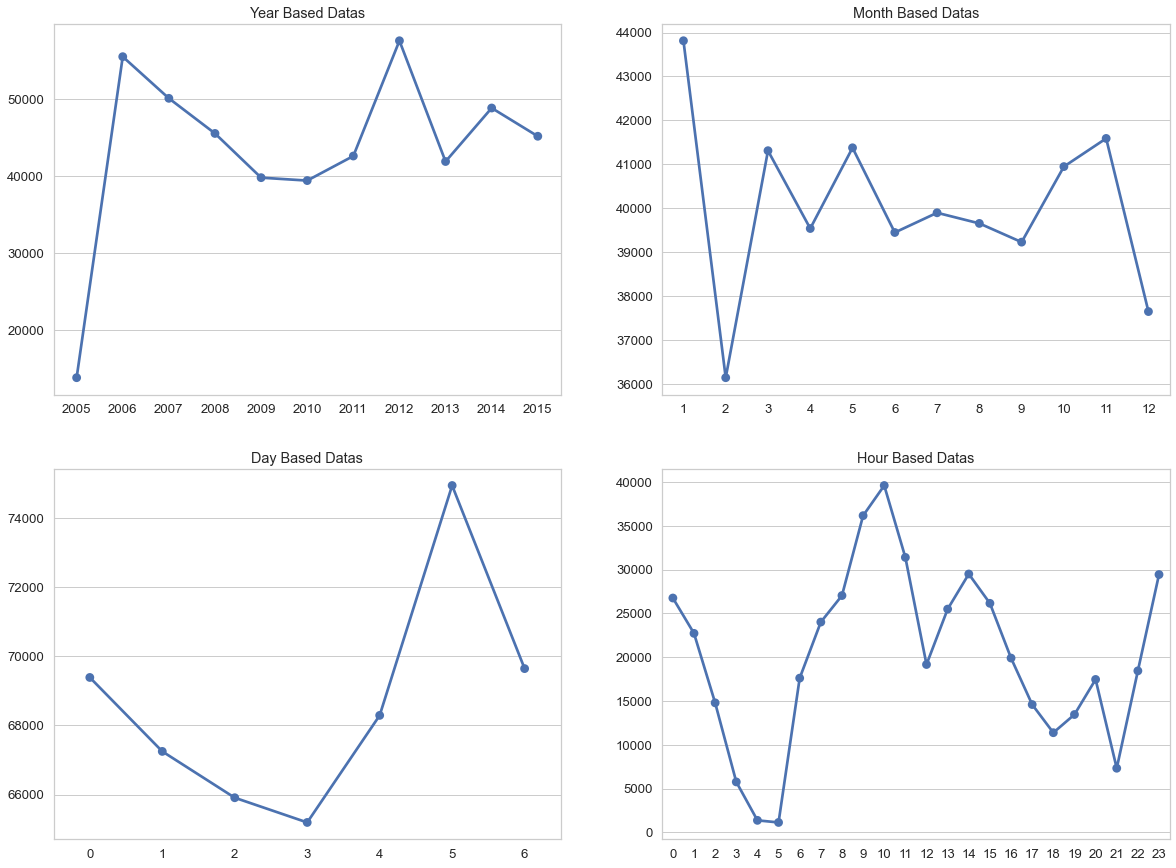

In [526]:
fig, ax = plt.subplots(2,2, figsize=(20,15))
sns.pointplot(x=ri["stop_time"].dt.year.value_counts(ascending=False).index, y=ri["stop_time"].dt.year.value_counts(ascending=False).values , 
              ax=ax[0,0]).set_title("Year Based Datas");
sns.pointplot(x=ri["stop_time"].dt.month.value_counts(ascending=False).index, y=ri["stop_time"].dt.month.value_counts(ascending=False).values ,
              ax=ax[0,1]).set_title("Month Based Datas")
sns.pointplot(x=ri["stop_time"].dt.dayofweek.value_counts(ascending=False).index, y=ri["stop_time"].dt.dayofweek.value_counts(ascending=False).values ,
              ax=ax[1,0]).set_title("Day Based Datas")
sns.pointplot(x=ri["stop_time"].dt.hour.value_counts(ascending=False).index, y=ri["stop_time"].dt.hour.value_counts(ascending=False).values ,
              ax=ax[1,1]).set_title("Hour Based Datas")



**In the time-based analysis, the most data belongs to 2012, while the amount of data for 2005 is at the lowest level**

**In a month-based analysis, January is the most one with approximately 44000 violation, February is the last one with appr. 36000 violation.**

**In the day-based review, Friday has most, Wednesday has last.**

**Interestingly, the hourly review shows that the most police stoppages occur between 9 am and 11 am. It is observed that the number of police stops between 20 and 22 hours is quite low.**

### Examining District

In [527]:
pd.crosstab(ri.district, ri.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3788,7130,1502,628,1,33068
Zone K2,11285,16440,5103,4056,2898,57500
Zone K3,12959,16218,3929,3871,3660,68238
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17179,4070,3532,4446,48690
Zone X4,19975,29556,8865,7551,4871,54855


<AxesSubplot:xlabel='district', ylabel='count'>

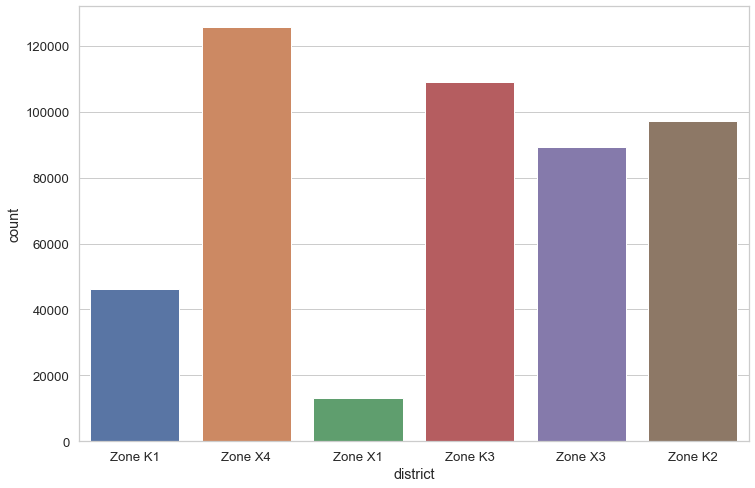

In [528]:
sns.countplot(ri.district)

**According to the table, the most police stops were made in Zone X4. The least occurred in Zone X1.**

## Examining Violations

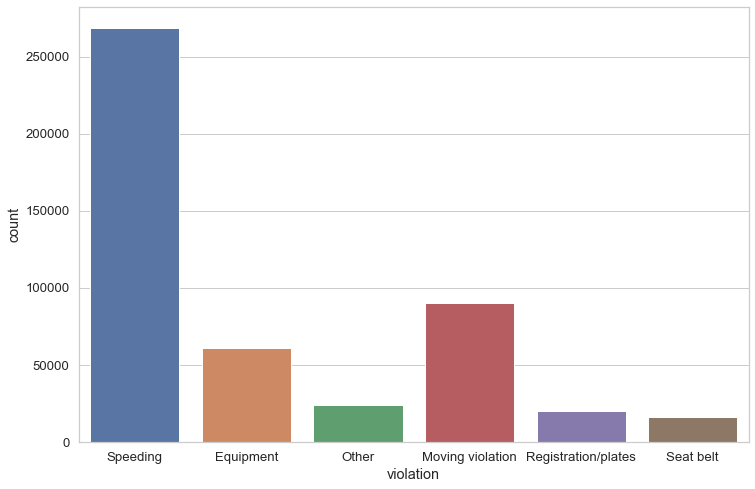

In [529]:
sns.countplot(data=ri, x="violation");

### Violations by gender

In [530]:
ri.groupby("driver_gender")["violation"].value_counts(dropna=False, normalize=True)

driver_gender  violation          
F              Speeding              0.66
               Moving violation      0.14
               Equipment             0.11
               Registration/plates   0.04
               Other                 0.03
               Seat belt             0.03
M              Speeding              0.52
               Moving violation      0.21
               Equipment             0.14
               Other                 0.06
               Registration/plates   0.04
               Seat belt             0.04
Name: violation, dtype: float64

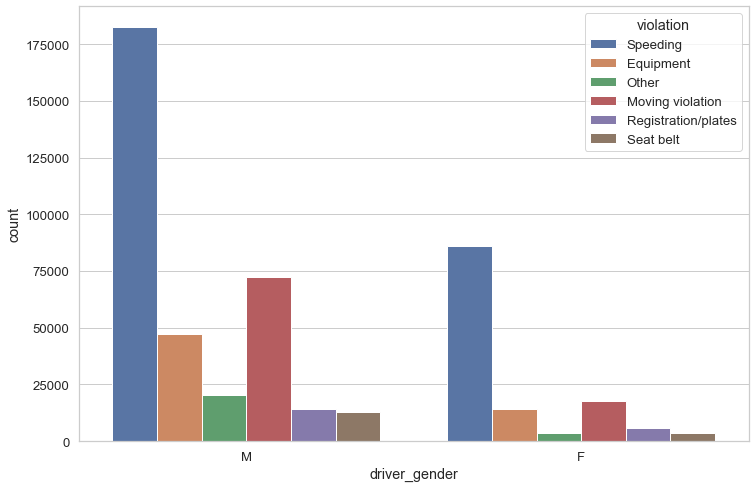

In [531]:
sns.countplot(data=ri, x="driver_gender", hue="violation");

**Speeding is the most common violation in men and women (81%-73%). It is seen that while women commit more speeding violations than men, men do more movement violations.**

In [532]:
ri.groupby("violation")["driver_gender"].value_counts(dropna=False, normalize=True)

violation            driver_gender
Equipment            M               0.77
                     F               0.23
                     NaN             0.00
Moving violation     M               0.80
                     F               0.20
                     NaN             0.00
Other                M               0.84
                     F               0.16
                     NaN             0.00
Registration/plates  M               0.72
                     F               0.28
Seat belt            M               0.78
                     F               0.22
                     NaN             0.00
Speeding             M               0.68
                     F               0.32
                     NaN             0.00
Name: driver_gender, dtype: float64

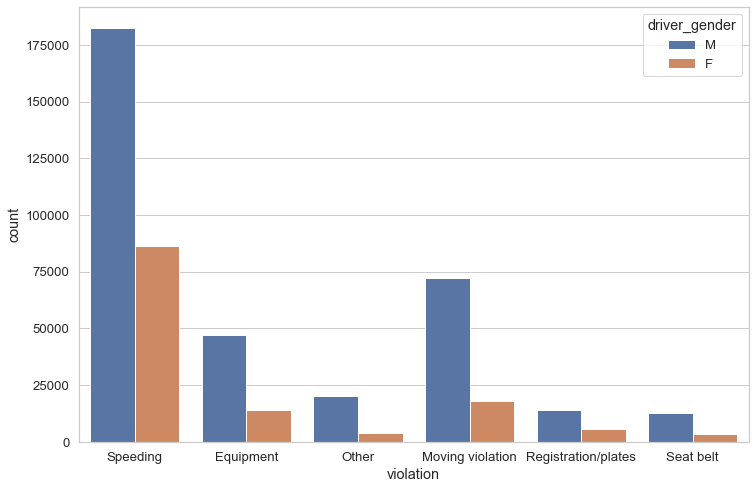

In [533]:
sns.countplot(data=ri, x="violation", hue="driver_gender");

**Speeding is the most common violation in men and women (81%-73%)**

### Violations by age

In [534]:
ri.groupby("age_period")["violation"].value_counts(dropna=False, normalize=True)

age_period     violation          
(13.0, 18.0]   Speeding              0.70
               Moving violation      0.13
               Equipment             0.10
               Registration/plates   0.03
               Other                 0.02
               Seat belt             0.01
(18.0, 30.0]   Speeding              0.58
               Moving violation      0.16
               Equipment             0.15
               Registration/plates   0.04
               Seat belt             0.04
               Other                 0.03
(30.0, 50.0]   Speeding              0.54
               Moving violation      0.21
               Equipment             0.12
               Other                 0.06
               Registration/plates   0.04
               Seat belt             0.03
(50.0, 70.0]   Speeding              0.54
               Moving violation      0.24
               Other                 0.09
               Equipment             0.09
               Registration/plates   0.03

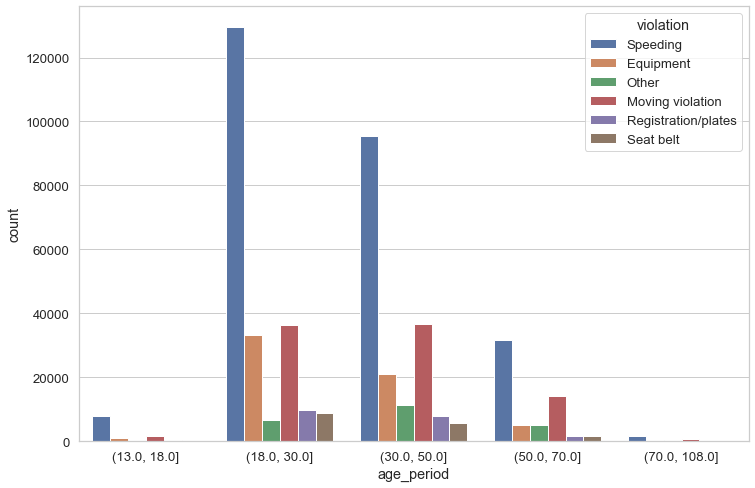

In [535]:
sns.countplot(data=ri, x="age_period", hue="violation");

**Speeding is the most common type of violation for all age groups. Second one is moving violation, and in the third place is the equipment violations.**

In [536]:
ri.groupby("violation")["age_period"].value_counts(dropna=False, normalize=True)

violation                         
Equipment            (18.0, 30.0]    0.55
                     (30.0, 50.0]    0.35
                     (50.0, 70.0]    0.08
                     (13.0, 18.0]    0.02
                     (70.0, 108.0]   0.00
Moving violation     (30.0, 50.0]    0.41
                     (18.0, 30.0]    0.41
                     (50.0, 70.0]    0.16
                     (13.0, 18.0]    0.02
                     (70.0, 108.0]   0.01
Other                (30.0, 50.0]    0.48
                     (18.0, 30.0]    0.28
                     (50.0, 70.0]    0.22
                     (13.0, 18.0]    0.01
                     (70.0, 108.0]   0.01
Registration/plates  (18.0, 30.0]    0.50
                     (30.0, 50.0]    0.39
                     (50.0, 70.0]    0.08
                     (13.0, 18.0]    0.02
                     (70.0, 108.0]   0.00
Seat belt            (18.0, 30.0]    0.55
                     (30.0, 50.0]    0.35
                     (50.0, 70.0]    0.09

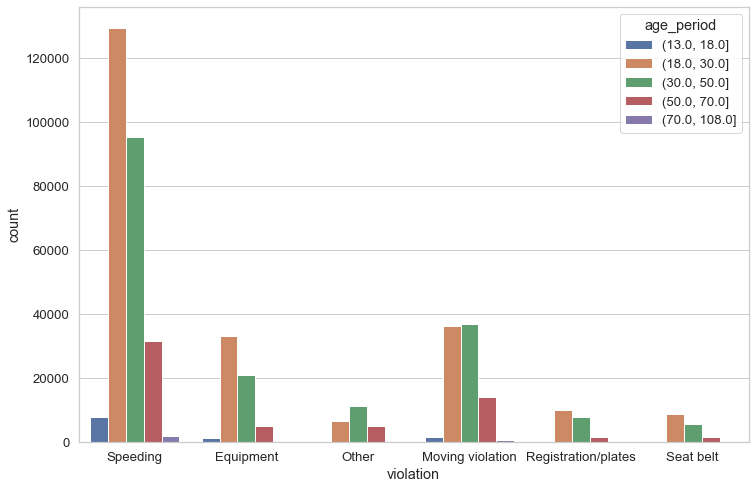

In [537]:
sns.countplot(data=ri, x="violation", hue="age_period");

**Moving violation is seen to be the most common violation between the ages of 30 and 50. The ranking is similar in other age groups.**

### Violations by race

In [538]:
ri.groupby("driver_race")["violation"].value_counts(dropna=False, normalize=True)

driver_race  violation          
Asian        Speeding              0.68
             Moving violation      0.14
             Equipment             0.09
             Other                 0.04
             Registration/plates   0.03
             Seat belt             0.02
Black        Speeding              0.41
             Moving violation      0.23
             Equipment             0.18
             Other                 0.07
             Registration/plates   0.07
             Seat belt             0.04
Hispanic     Speeding              0.33
             Moving violation      0.25
             Equipment             0.22
             Registration/plates   0.08
             Other                 0.06
             Seat belt             0.06
Other        Speeding              0.63
             Moving violation      0.20
             Equipment             0.07
             Other                 0.07
             Registration/plates   0.02
             Seat belt             0.01
White  

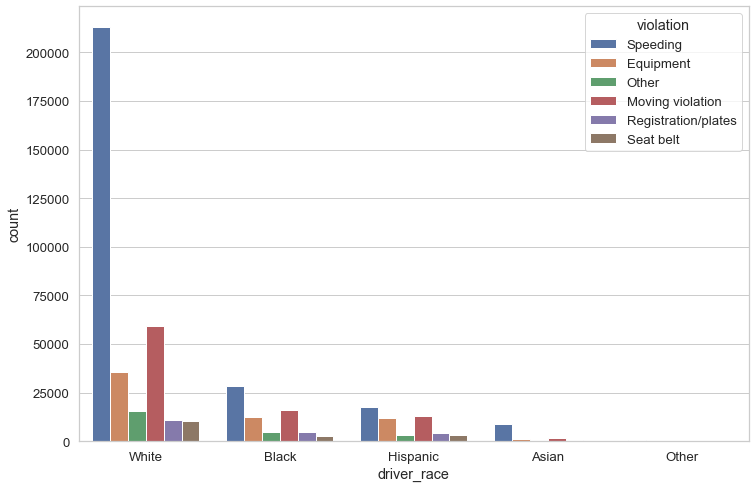

In [539]:
sns.countplot(data=ri, x="driver_race", hue="violation");

**No extreme cases were identified in the distribution of race by violations. The ordering is similar to the tables above.**

In [540]:
ri.groupby("violation")["driver_race"].value_counts(dropna=False, normalize=True)

violation            driver_race
Equipment            White         0.58
                     Black         0.20
                     Hispanic      0.19
                     Asian         0.02
                     Other         0.00
Moving violation     White         0.65
                     Black         0.18
                     Hispanic      0.15
                     Asian         0.02
                     Other         0.00
Other                White         0.64
                     Black         0.20
                     Hispanic      0.14
                     Asian         0.02
                     Other         0.00
Registration/plates  White         0.54
                     Black         0.23
                     Hispanic      0.20
                     Asian         0.02
                     Other         0.00
Seat belt            White         0.65
                     Hispanic      0.19
                     Black         0.15
                     Asian         0.02
       

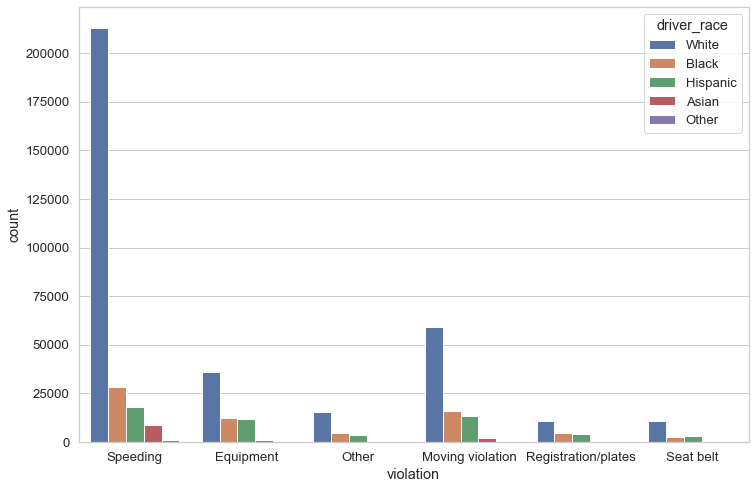

In [541]:
sns.countplot(data=ri, x="violation", hue="driver_race");

**No extreme cases were identified in the distribution of violations by race. The ordering is similar to the tables above.**

## Examining Search Conducted


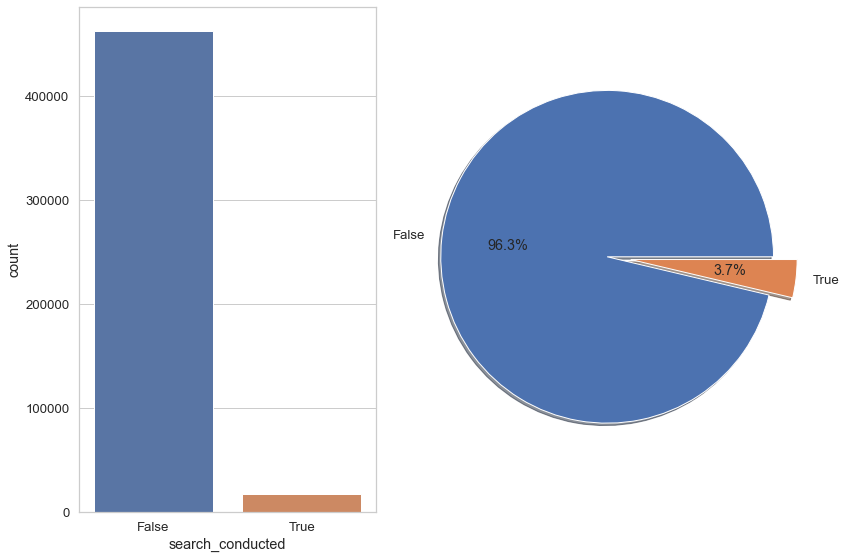

In [542]:
fig, ax = plt.subplots(1,2)
sns.countplot(x="search_conducted", data=ri, ax=ax[0])
ri.search_conducted.value_counts().plot.pie(subplots=True, explode=[0.2,0], radius=1.4, shadow=True, autopct="%.1f%%")
plt.tight_layout()

### Searching by gender

In [543]:
ri.groupby("driver_gender")["search_conducted"].value_counts(normalize=True)

driver_gender  search_conducted
F              False              0.98
               True               0.02
M              False              0.96
               True               0.04
Name: search_conducted, dtype: float64

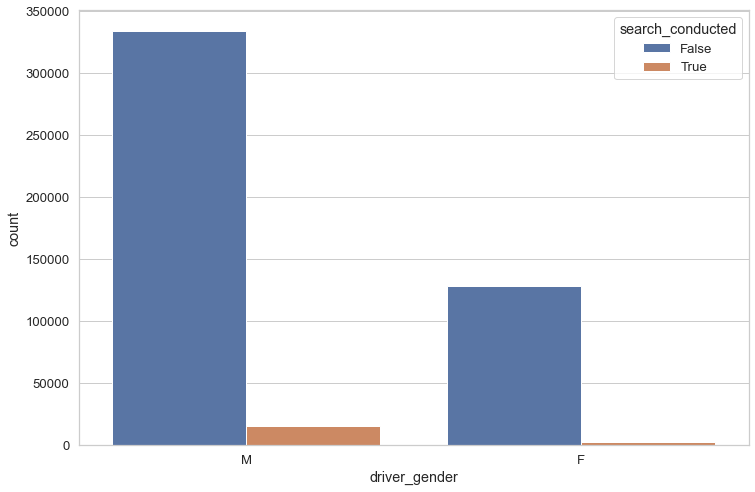

In [544]:
sns.countplot(data=ri, x="driver_gender", hue="search_conducted");

**It is seen that the rate of searching for men is twice that of women.**

In [545]:
ri.groupby("search_conducted")["driver_gender"].value_counts(normalize=True)

search_conducted  driver_gender
False             M               0.72
                  F               0.28
True              M               0.86
                  F               0.14
Name: driver_gender, dtype: float64

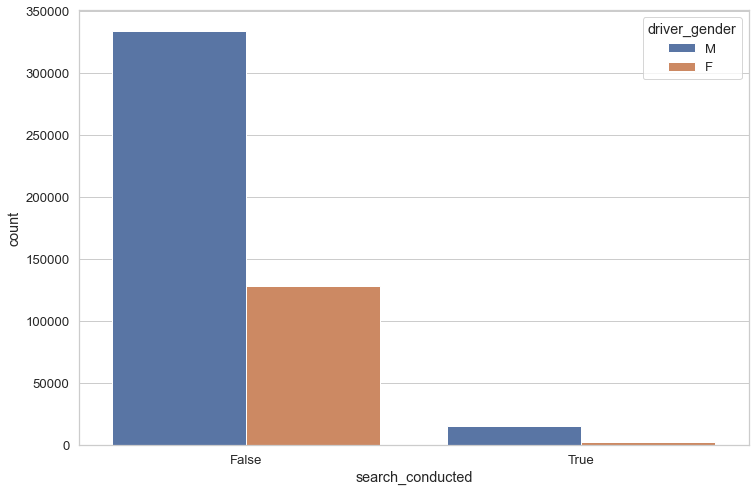

In [546]:
sns.countplot(data=ri, x="search_conducted", hue="driver_gender");

**Since the number of men is higher, the graphic distribution is like this.**

### Searching by age

In [547]:
ri.groupby("age_period")["search_conducted"].value_counts(normalize=True)

age_period     search_conducted
(13.0, 18.0]   False              0.96
               True               0.04
(18.0, 30.0]   False              0.95
               True               0.05
(30.0, 50.0]   False              0.97
               True               0.03
(50.0, 70.0]   False              0.98
               True               0.02
(70.0, 108.0]  False              0.99
               True               0.01
Name: search_conducted, dtype: float64

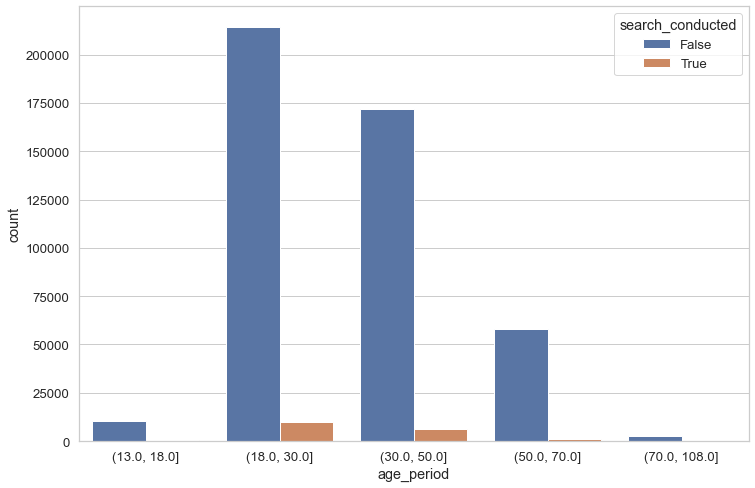

In [548]:
sns.countplot(data=ri, x="age_period", hue="search_conducted");

**It is seen that the rate of searching between the ages of 18 and 30 is higher than other age ranges.**

In [549]:
ri.groupby("search_conducted")["age_period"].value_counts(normalize=True)

search_conducted               
False             (18.0, 30.0]    0.47
                  (30.0, 50.0]    0.38
                  (50.0, 70.0]    0.13
                  (13.0, 18.0]    0.02
                  (70.0, 108.0]   0.01
True              (18.0, 30.0]    0.57
                  (30.0, 50.0]    0.35
                  (50.0, 70.0]    0.05
                  (13.0, 18.0]    0.02
                  (70.0, 108.0]   0.00
Name: age_period, dtype: float64

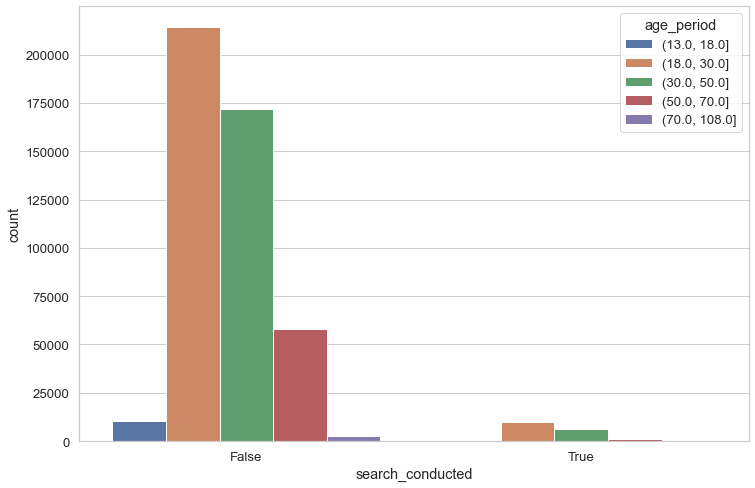

In [550]:
sns.countplot(data=ri, x="search_conducted", hue="age_period");

### Searching by race

In [551]:
ri[ri["search_conducted"] == True]["driver_race"].value_counts(normalize=True)

White      0.56
Black      0.24
Hispanic   0.18
Asian      0.02
Other      0.00
Name: driver_race, dtype: float64

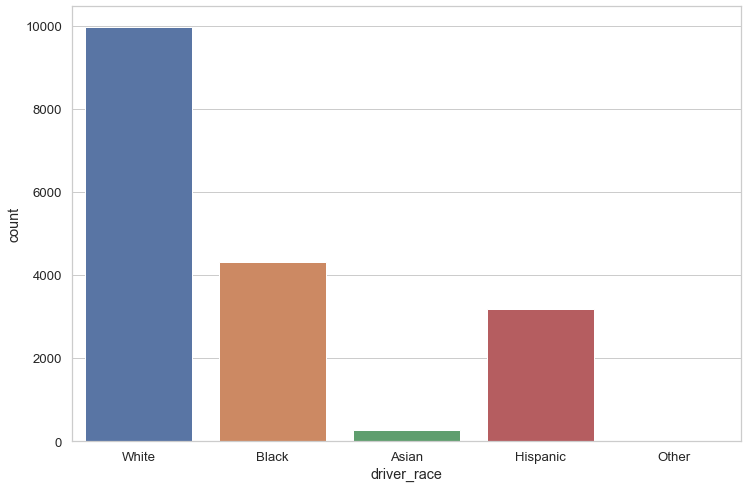

In [552]:
sns.countplot(data=ri[ri["search_conducted"] == True], x="driver_race");

In [553]:
ri.groupby("driver_race")["search_conducted"].value_counts(normalize=True)

driver_race  search_conducted
Asian        False              0.98
             True               0.02
Black        False              0.94
             True               0.06
Hispanic     False              0.94
             True               0.06
Other        False              0.99
             True               0.01
White        False              0.97
             True               0.03
Name: search_conducted, dtype: float64

**Although in graph it is seen that, whites have the most percentage, the rate of search for blacks and Hispanics appears to be significantly different from those of other races.**

## Examining Search Type (Protective Frisk)


In [554]:
ri.search_type.value_counts(dropna=False)

NaN                                                         462846
Incident to Arrest                                            6998
Probable Cause                                                4989
Reasonable Suspicion                                          1141
Inventory                                                     1101
Protective Frisk                                               879
Incident to Arrest,Inventory                                   649
Incident to Arrest,Probable Cause                              552
Probable Cause,Reasonable Suspicion                            334
Probable Cause,Protective Frisk                                221
Incident to Arrest,Protective Frisk                            158
Incident to Arrest,Inventory,Probable Cause                    151
Inventory,Probable Cause                                       132
Protective Frisk,Reasonable Suspicion                           83
Incident to Arrest,Inventory,Protective Frisk                 

In [555]:
ri["frisk"] = ri.search_type.str.contains("Frisk") == True

In [556]:
protective_frisk = ri[ri["search_conducted"] == True]

### Searching by gender

In [557]:
protective_frisk.groupby("frisk")["driver_gender"].value_counts(normalize=True)

frisk  driver_gender
False  M               0.86
       F               0.14
True   M               0.90
       F               0.10
Name: driver_gender, dtype: float64

In [558]:
protective_frisk.groupby("driver_gender")["frisk"].value_counts(normalize=True)

driver_gender  frisk
F              False   0.93
               True    0.07
M              False   0.91
               True    0.09
Name: frisk, dtype: float64

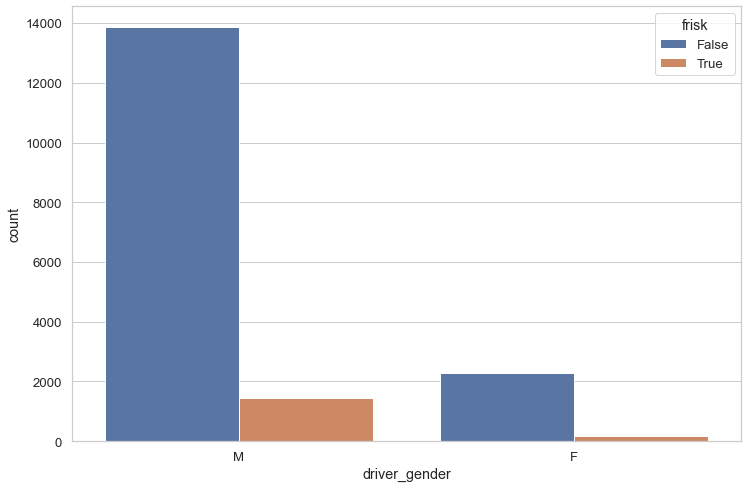

In [559]:
sns.countplot(data=protective_frisk, x="driver_gender", hue="frisk");

**While the rate of protective frisked of people who have been searched is 9% for men, it is 7% for women.**

### Searching by age

In [560]:
protective_frisk.groupby("age_period")["frisk"].value_counts(normalize=True)

age_period     frisk
(13.0, 18.0]   False   0.88
               True    0.12
(18.0, 30.0]   False   0.91
               True    0.09
(30.0, 50.0]   False   0.91
               True    0.09
(50.0, 70.0]   False   0.93
               True    0.07
(70.0, 108.0]  False   0.94
               True    0.06
Name: frisk, dtype: float64

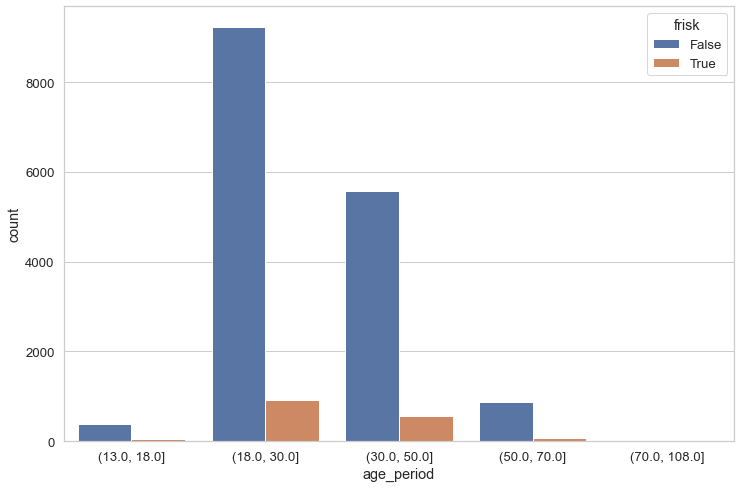

In [561]:
sns.countplot(data=protective_frisk, x="age_period", hue="frisk");

**While the rate of protective frisked of people who have been searched is 12% for the age between 13 and 18,second one is 18 and 30 age group. This is interesting that younger people have a higher protective frisk rate**

### Searching by race

In [562]:
protective_frisk.groupby("driver_race")["frisk"].value_counts(normalize=True)

driver_race  frisk
Asian        False   0.89
             True    0.11
Black        False   0.92
             True    0.08
Hispanic     False   0.93
             True    0.07
Other        False   0.93
             True    0.07
White        False   0.90
             True    0.10
Name: frisk, dtype: float64

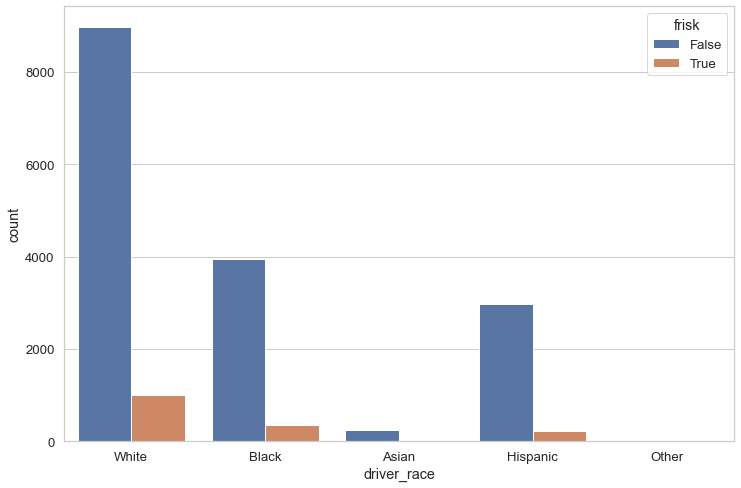

In [563]:
sns.countplot(data=protective_frisk, x="driver_race", hue="frisk");

**Asians have the highest proportion of protective frisk by race.**

## Examining Contraband Found

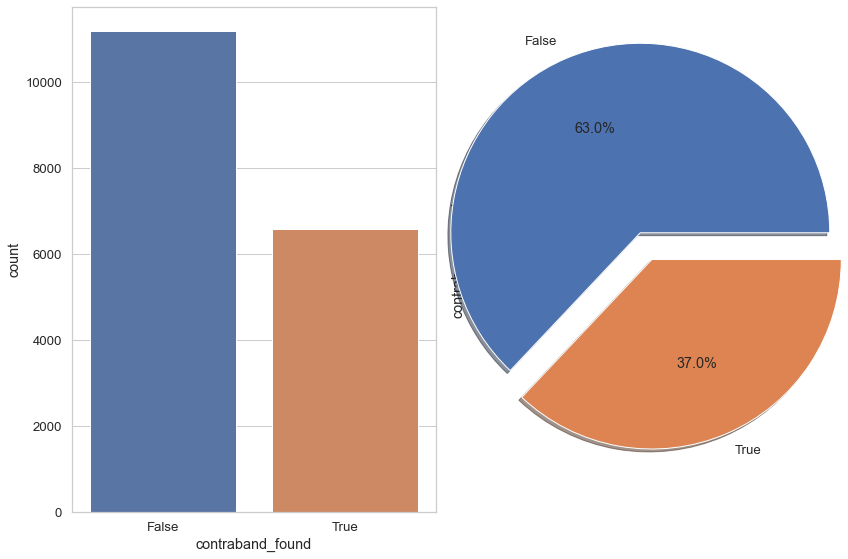

In [564]:
fig, ax = plt.subplots(1,2)
sns.countplot(ri[ri.search_conducted == True]["contraband_found"], ax=ax[0])
ri[ri.search_conducted == True]["contraband_found"].value_counts().plot.pie(subplots=True, explode=[0.2,0], radius=1.3, shadow=True, autopct="%.1f%%")
plt.tight_layout()

**It is seen that in 37% of those who are searched, contraband found.**

### Searching by gender

In [565]:
ri[ri.search_conducted == True].groupby("driver_gender")["contraband_found"].value_counts(normalize=True)

driver_gender  contraband_found
F              False              0.66
               True               0.34
M              False              0.62
               True               0.38
Name: contraband_found, dtype: float64

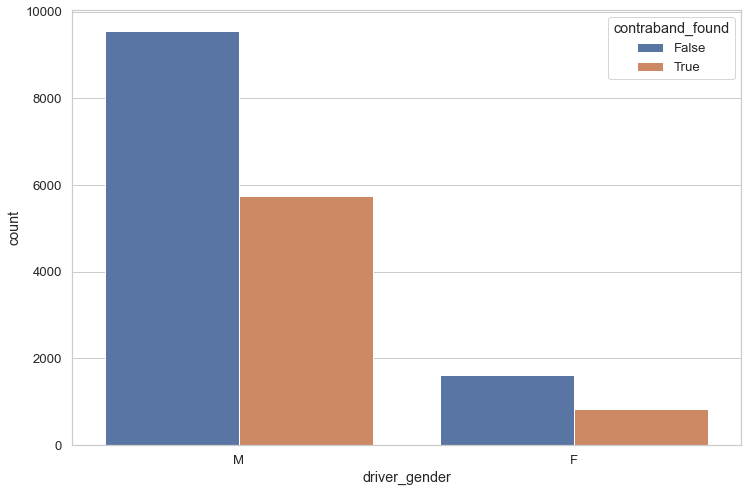

In [566]:
sns.countplot(x=ri[ri.search_conducted == True]["driver_gender"], hue=ri[ri.search_conducted == True]["contraband_found"]);

**While 38% of the searched men found contraband, this rate remained at 34% for women.**

### Searching by age

In [567]:
ri[ri.search_conducted == True].groupby("age_period")["contraband_found"].value_counts(normalize=True)

age_period     contraband_found
(13.0, 18.0]   False              0.57
               True               0.43
(18.0, 30.0]   False              0.60
               True               0.40
(30.0, 50.0]   False              0.67
               True               0.33
(50.0, 70.0]   False              0.68
               True               0.32
(70.0, 108.0]  False              0.94
               True               0.06
Name: contraband_found, dtype: float64

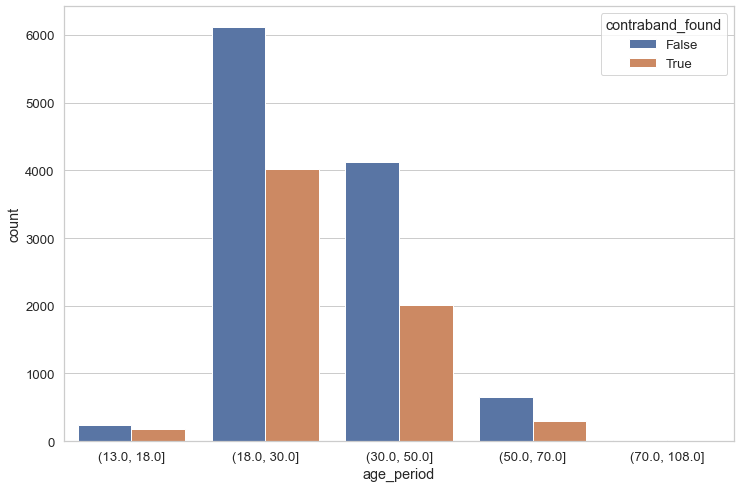

In [568]:
sns.countplot(x=ri[ri.search_conducted == True]["age_period"], hue=ri[ri.search_conducted == True]["contraband_found"]);

**When we look at the age periods, we see that the highest rate of possession of illegal goods is between the ages of 13 and 18.**

### Searching by race

In [569]:
ri[ri.search_conducted == True].groupby("driver_race")["contraband_found"].value_counts(normalize=True)

driver_race  contraband_found
Asian        False              0.67
             True               0.33
Black        False              0.63
             True               0.37
Hispanic     False              0.67
             True               0.33
Other        False              0.93
             True               0.07
White        False              0.61
             True               0.39
Name: contraband_found, dtype: float64

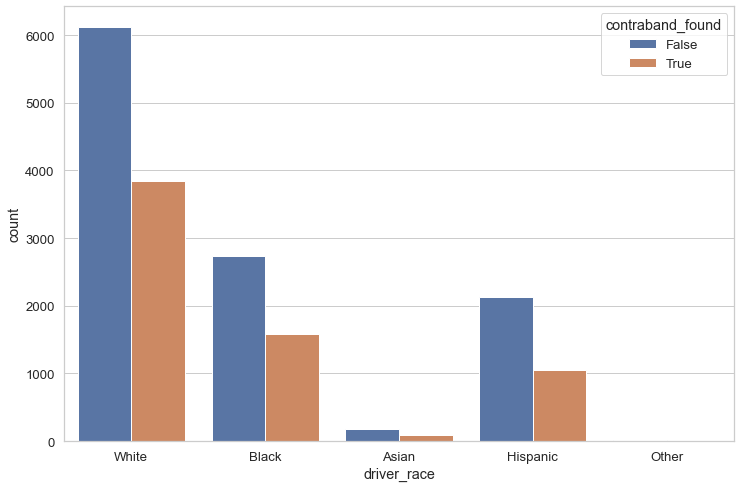

In [570]:
sns.countplot(x=ri[ri.search_conducted == True]["driver_race"], hue=ri[ri.search_conducted == True]["contraband_found"]);

**When we look at the rates of illegal possession by race, whites have the highest rate, while the rates of other races are close to whites. Only minorities not included in the list are quite low. It can be interpreted that the minorities obey the rules more in this regard.**

## Examining Stop Outcome

In [571]:
ri["stop_outcome"].value_counts(normalize=True)

Citation           0.89
Warning            0.06
Arrest Driver      0.03
N/D                0.01
No Action          0.01
Arrest Passenger   0.00
Name: stop_outcome, dtype: float64

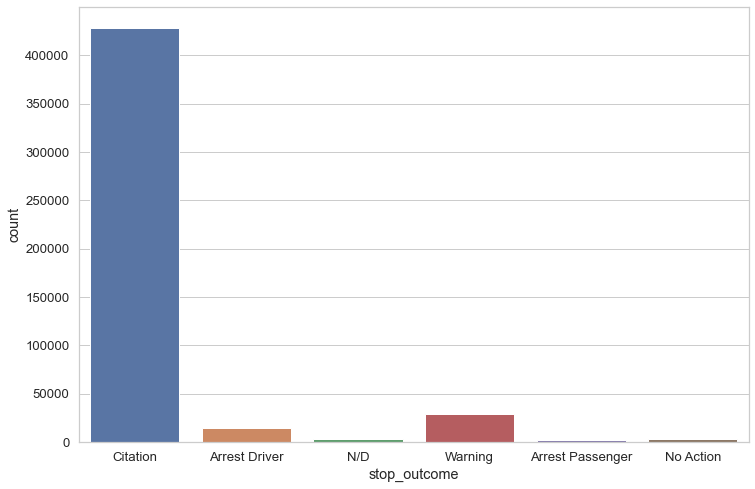

In [572]:
sns.countplot(ri["stop_outcome"]);

### Searching by gender

In [573]:
ri.groupby("driver_gender")["stop_outcome"].value_counts(dropna=False, normalize=True)

driver_gender  stop_outcome    
F              Citation           0.90
               Warning            0.06
               Arrest Driver      0.02
               No Action          0.01
               N/D                0.01
               Arrest Passenger   0.01
M              Citation           0.89
               Warning            0.06
               Arrest Driver      0.03
               N/D                0.01
               No Action          0.01
               Arrest Passenger   0.00
Name: stop_outcome, dtype: float64

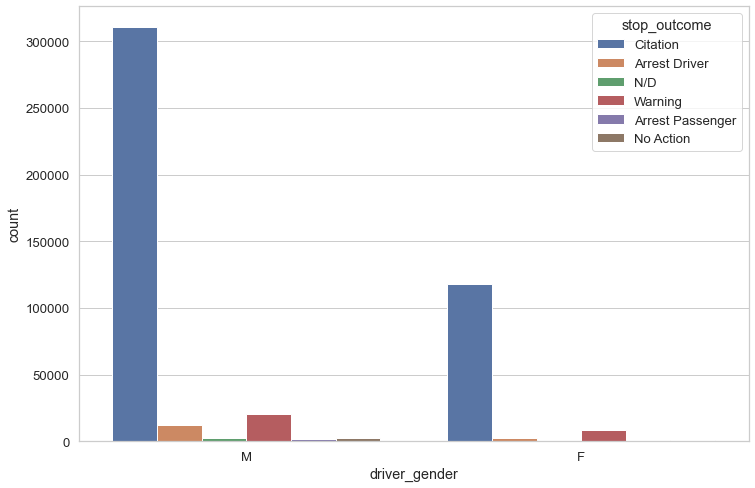

In [574]:
sns.countplot(data=ri, x="driver_gender", hue="stop_outcome");

**As can be seen from the table, there is not much difference between the criminal situations of women and men.**

### Searching by age

In [575]:
ri.groupby("age_period")["stop_outcome"].value_counts(dropna=False, normalize=True)

age_period     stop_outcome    
(13.0, 18.0]   Citation           0.93
               Warning            0.03
               Arrest Driver      0.02
               N/D                0.01
               No Action          0.00
               Arrest Passenger   0.00
(18.0, 30.0]   Citation           0.89
               Warning            0.05
               Arrest Driver      0.03
               N/D                0.01
               No Action          0.01
               Arrest Passenger   0.01
(30.0, 50.0]   Citation           0.89
               Warning            0.06
               Arrest Driver      0.03
               No Action          0.01
               N/D                0.01
               Arrest Passenger   0.00
(50.0, 70.0]   Citation           0.90
               Warning            0.07
               Arrest Driver      0.02
               No Action          0.01
               N/D                0.01
               Arrest Passenger   0.00
(70.0, 108.0]  Citation         

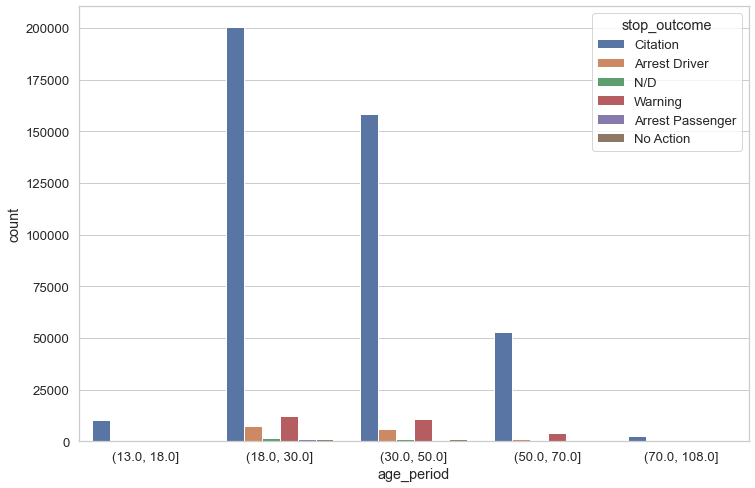

In [576]:
sns.countplot(data=ri, x="age_period", hue="stop_outcome");

**The highest warning rate is over the age of 70, and the highest rate of fines is between the ages of 13 and 18. The highest rate of arrest is between the ages of 18 and 30.**

### Searching by race

In [577]:
ri.groupby("driver_race")["stop_outcome"].value_counts(dropna=False, normalize=True)

driver_race  stop_outcome    
Asian        Citation           0.93
             Warning            0.04
             Arrest Driver      0.02
             No Action          0.01
             N/D                0.00
             Arrest Passenger   0.00
Black        Citation           0.86
             Warning            0.07
             Arrest Driver      0.05
             N/D                0.01
             Arrest Passenger   0.01
             No Action          0.01
Hispanic     Citation           0.85
             Warning            0.07
             Arrest Driver      0.05
             N/D                0.01
             No Action          0.01
             Arrest Passenger   0.01
Other        Citation           0.92
             Warning            0.06
             Arrest Driver      0.01
             No Action          0.01
             N/D                0.00
             Arrest Passenger   0.00
White        Citation           0.90
             Warning            0.06
        

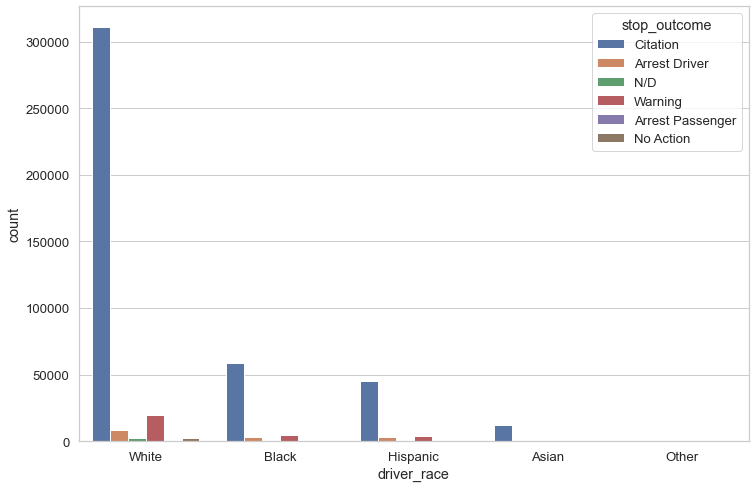

In [578]:
sns.countplot(data=ri, x="driver_race", hue="stop_outcome");

**Asians have the highest rates of citations, while blacks and Hispanics have the highest rates of arrests and warnings.**

### Searching by search conducted

In [579]:
ri.groupby("search_conducted")["stop_outcome"].value_counts(normalize=True)

search_conducted  stop_outcome    
False             Citation           0.90
                  Warning            0.06
                  Arrest Driver      0.02
                  N/D                0.01
                  No Action          0.01
                  Arrest Passenger   0.00
True              Citation           0.59
                  Arrest Driver      0.30
                  Arrest Passenger   0.05
                  Warning            0.04
                  No Action          0.02
                  N/D                0.01
Name: stop_outcome, dtype: float64

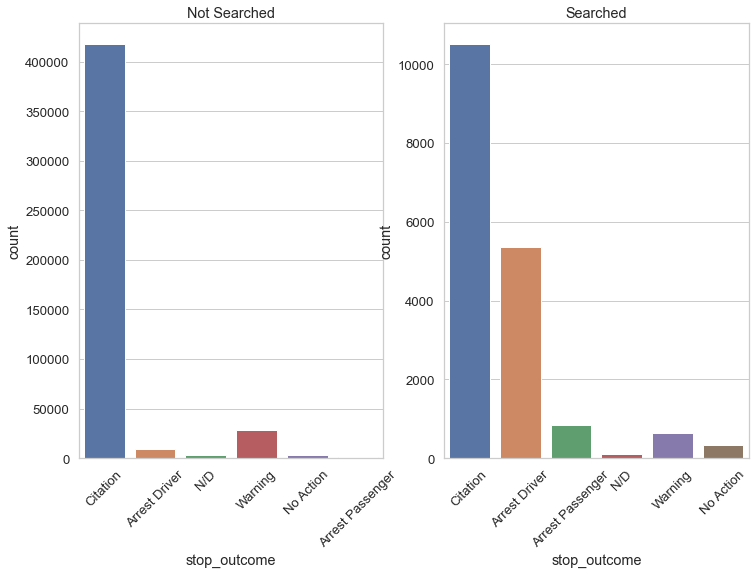

In [580]:
plt.subplot(1,2,1)
sns.countplot(ri[ri["search_conducted"] == False]["stop_outcome"]).set_title("Not Searched")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.countplot(ri[ri["search_conducted"] == True]["stop_outcome"]).set_title("Searched");
plt.xticks(rotation=45);

**While the rate of arrest is 35% for those who are searched, this rate is 2% for those who do not.**

### Searching by contraband found

In [581]:
ri.groupby("contraband_found")["stop_outcome"].value_counts(normalize=True)

contraband_found  stop_outcome    
False             Citation           0.89
                  Warning            0.06
                  Arrest Driver      0.03
                  N/D                0.01
                  No Action          0.01
                  Arrest Passenger   0.00
True              Citation           0.64
                  Arrest Driver      0.26
                  Arrest Passenger   0.04
                  Warning            0.04
                  No Action          0.02
                  N/D                0.01
Name: stop_outcome, dtype: float64

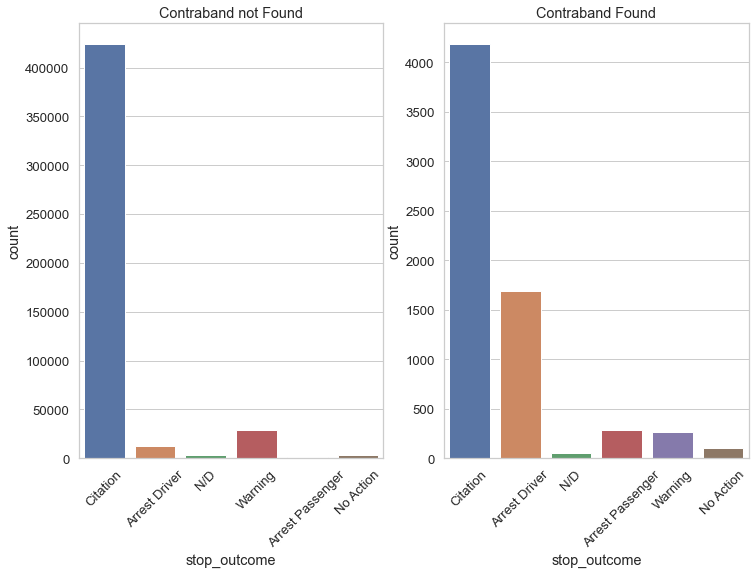

In [582]:
plt.subplot(1,2,1)
sns.countplot(ri[ri["contraband_found"] == False]["stop_outcome"]).set_title("Contraband not Found")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.countplot(ri[ri["contraband_found"] == True]["stop_outcome"]).set_title("Contraband Found");
plt.xticks(rotation=45);

**While the rate of arrest is 30% for contraband found, this rate is 2% for those who do not.**

## Examining Is Arrested

In [583]:
ri["is_arrested"].value_counts(normalize=True)

False   0.97
True    0.03
Name: is_arrested, dtype: float64

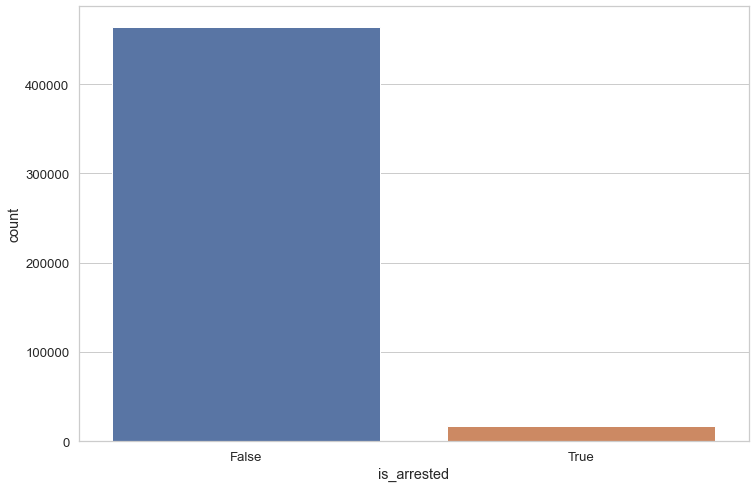

In [584]:
sns.countplot(ri["is_arrested"]);

### Searching by gender

In [585]:
ri.groupby("driver_gender")["is_arrested"].value_counts(dropna=False, normalize=True)

driver_gender  is_arrested
F              False         0.97
               True          0.03
M              False         0.96
               True          0.04
Name: is_arrested, dtype: float64

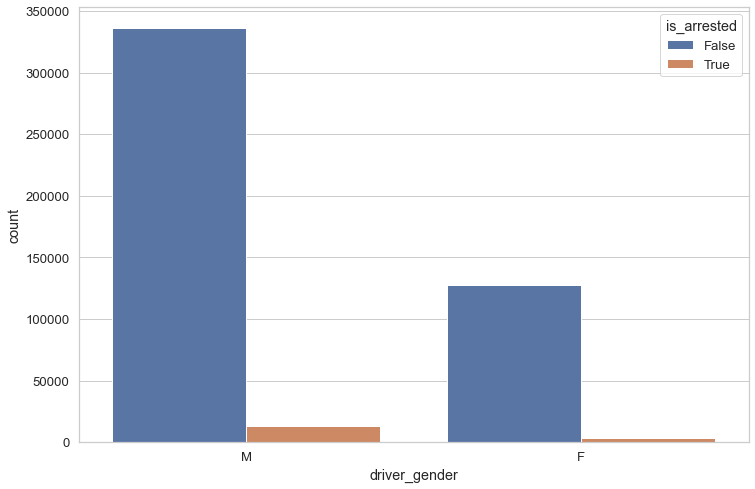

In [586]:
sns.countplot(data=ri, x="driver_gender", hue="is_arrested");

**There is not much difference in the arrest rates of men and women.**


### Searching by age

In [587]:
ri.groupby("age_period")["is_arrested"].value_counts(dropna=False, normalize=True)

age_period     is_arrested
(13.0, 18.0]   False         0.97
               True          0.03
(18.0, 30.0]   False         0.96
               True          0.04
(30.0, 50.0]   False         0.96
               True          0.04
(50.0, 70.0]   False         0.98
               True          0.02
(70.0, 108.0]  False         0.99
               True          0.01
Name: is_arrested, dtype: float64

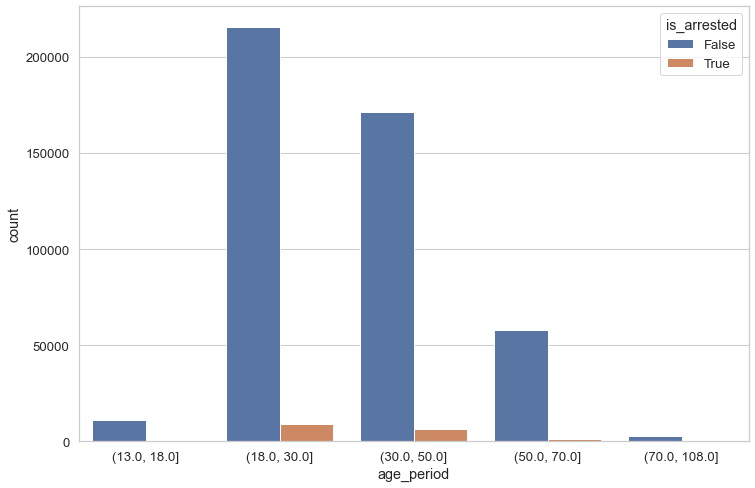

In [588]:
sns.countplot(data=ri, x="age_period", hue="is_arrested");

**It is seen that the highest rate of arrest is between the ages of 18 and 50.**

### Searching by race 

In [589]:
ri.groupby("driver_race")["is_arrested"].value_counts(dropna=False, normalize=True)

driver_race  is_arrested
Asian        False         0.98
             True          0.02
Black        False         0.94
             True          0.06
Hispanic     False         0.94
             True          0.06
Other        False         0.99
             True          0.01
White        False         0.97
             True          0.03
Name: is_arrested, dtype: float64

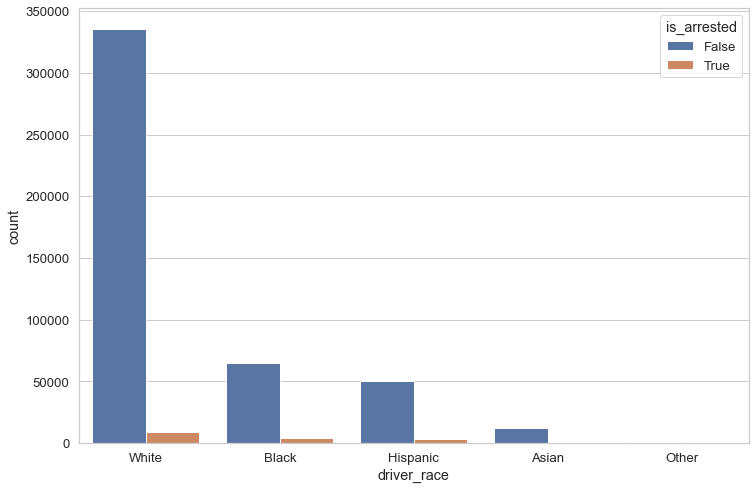

In [590]:
sns.countplot(data=ri, x="driver_race", hue="is_arrested");

**The highest rate of arrest is seen in blacks and Hispanics (6%).**

### Searching by violation

In [591]:
ri[ri["is_arrested"] == True]["violation"].value_counts(normalize=True)

Moving violation      0.31
Equipment             0.22
Speeding              0.22
Other                 0.12
Registration/plates   0.10
Seat belt             0.03
Name: violation, dtype: float64

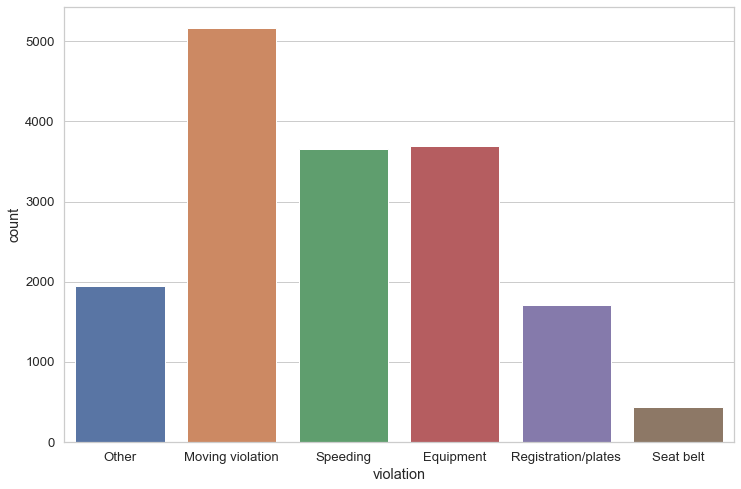

In [592]:
sns.countplot(ri[ri["is_arrested"] == True]["violation"]);

**The highest rate of arrest is due to moving violation.**

### Searching by search type

In [593]:
ri[ri["is_arrested"] == True]["search_type_raw"].value_counts(normalize=True).head(7)

Incident to Arrest                         0.63
Incident to Arrest,Inventory/Tow           0.07
Inventory/Tow                              0.04
Odor of Drugs/Alcohol                      0.04
Probable Cause                             0.04
Incident to Arrest,Odor of Drugs/Alcohol   0.02
Incident to Arrest,Terry Frisk             0.02
Name: search_type_raw, dtype: float64

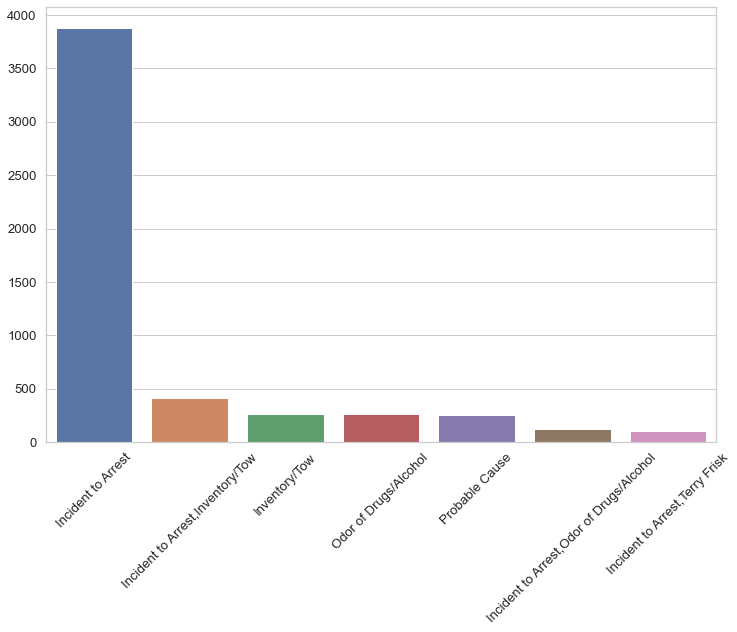

In [594]:
sns.barplot(x = ri[ri["is_arrested"] == True]["search_type_raw"].value_counts().head(7).index,
           y = ri[ri["is_arrested"] == True]["search_type_raw"].value_counts().head(7).values)
plt.xticks(rotation=45);


### Searching by contraband found

In [595]:
ri[ri["is_arrested"] == True]["contraband_found"].value_counts(normalize=True).head(7)

False   0.88
True    0.12
Name: contraband_found, dtype: float64

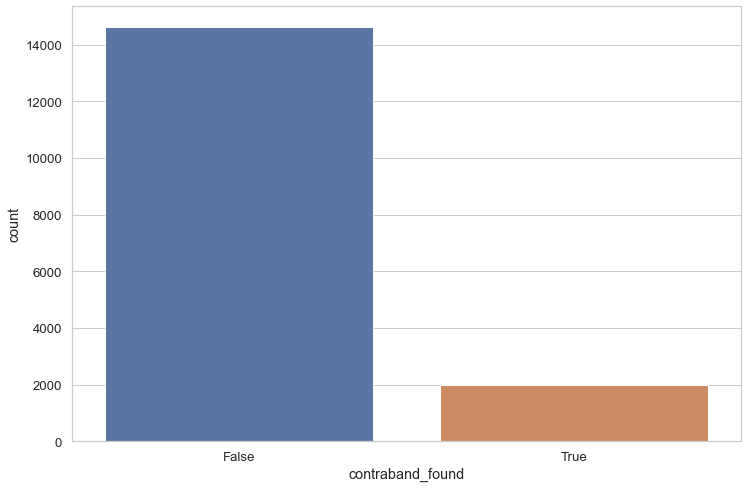

In [596]:
sns.countplot(ri[ri["is_arrested"] == True]["contraband_found"]);

**The arrest rate of persons with contraband is 12%.**

## Examining Stop Duration

<AxesSubplot:ylabel='stop_duration'>

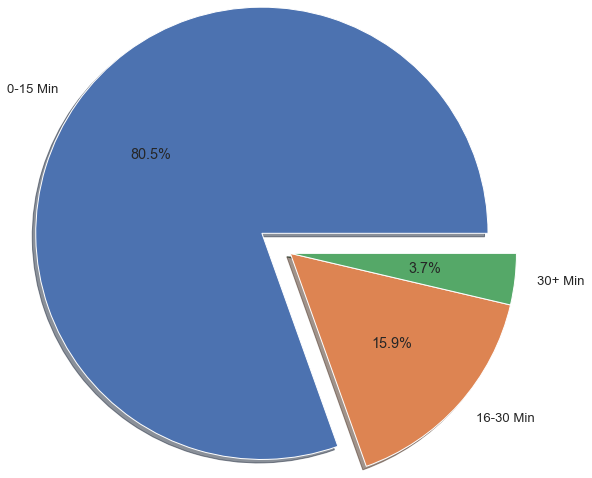

In [597]:
ri.stop_duration.value_counts(normalize=True).plot.pie(explode=[0.2,0,0], radius=1.3, shadow=True, autopct="%.1f%%")

### Searching by gender

In [598]:
ri.groupby("driver_gender")["stop_duration"].value_counts(dropna=False, normalize=True)

driver_gender  stop_duration
F              0-15 Min        0.84
               16-30 Min       0.14
               30+ Min         0.02
M              0-15 Min        0.79
               16-30 Min       0.16
               30+ Min         0.04
Name: stop_duration, dtype: float64

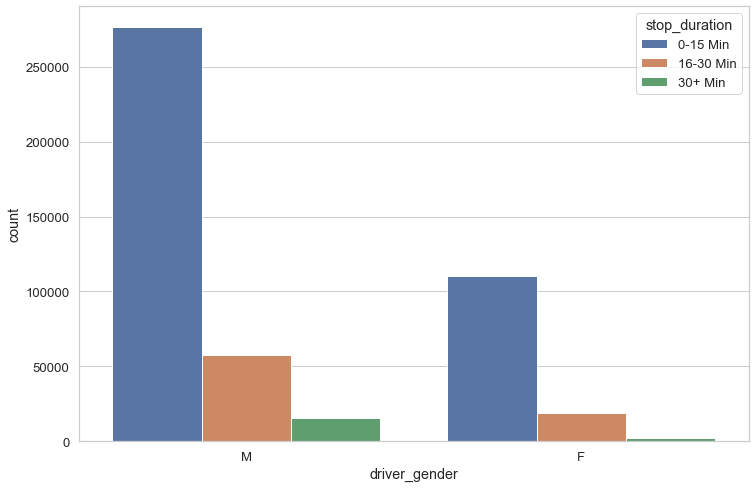

In [599]:
sns.countplot(data=ri, x="driver_gender", hue="stop_duration");

**We see that the duration of stopping for men is slightly longer than for women.**

### Searching by age

In [600]:
ri.groupby("age_period")["stop_duration"].value_counts(dropna=False, normalize=True)

age_period     stop_duration
(13.0, 18.0]   0-15 Min        0.80
               16-30 Min       0.18
               30+ Min         0.03
(18.0, 30.0]   0-15 Min        0.82
               16-30 Min       0.15
               30+ Min         0.03
(30.0, 50.0]   0-15 Min        0.79
               16-30 Min       0.16
               30+ Min         0.05
(50.0, 70.0]   0-15 Min        0.80
               16-30 Min       0.16
               30+ Min         0.04
(70.0, 108.0]  0-15 Min        0.82
               16-30 Min       0.16
               30+ Min         0.03
Name: stop_duration, dtype: float64

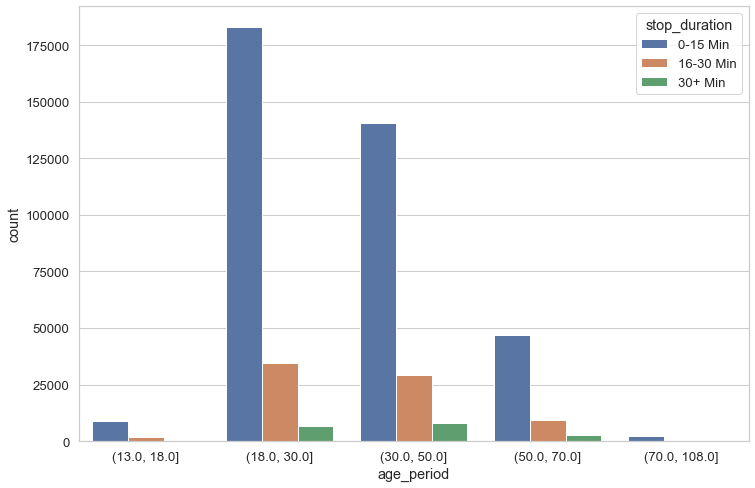

In [601]:
sns.countplot(data=ri, x="age_period", hue="stop_duration");

**It is seen that there is not much difference between age groups.**

### Searching by race

In [602]:
ri.groupby("driver_race")["stop_duration"].value_counts(dropna=False, normalize=True)

driver_race  stop_duration
Asian        0-15 Min        0.84
             16-30 Min       0.14
             30+ Min         0.03
Black        0-15 Min        0.78
             16-30 Min       0.17
             30+ Min         0.05
Hispanic     0-15 Min        0.78
             16-30 Min       0.17
             30+ Min         0.05
Other        0-15 Min        0.85
             16-30 Min       0.13
             30+ Min         0.02
White        0-15 Min        0.81
             16-30 Min       0.16
             30+ Min         0.03
Name: stop_duration, dtype: float64

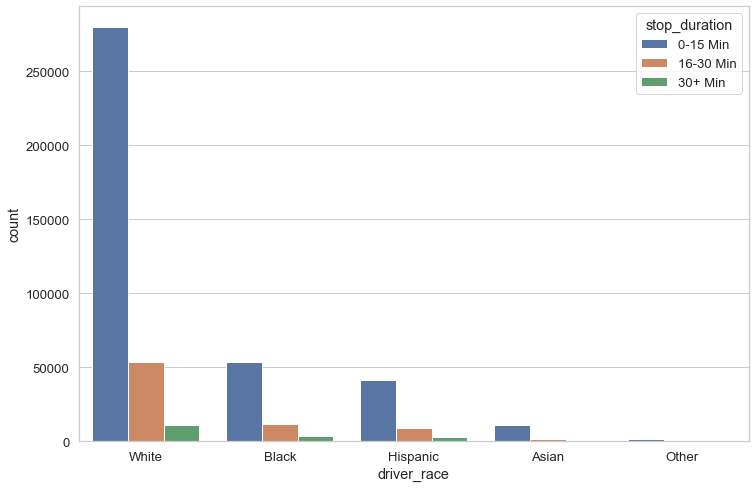

In [603]:
sns.countplot(data=ri, x="driver_race", hue="stop_duration");

**It is seen that the stopping times are longer in Black and Hispanic than in other races.**

### Searching by time

In [604]:
day_based = pd.crosstab(ri.stop_time.dt.dayofweek,ri.stop_duration, normalize=True)
day_based

stop_duration,0-15 Min,16-30 Min,30+ Min
stop_time,,,
0,0.12,0.02,0.01
1,0.11,0.02,0.01
2,0.11,0.02,0.01
3,0.11,0.02,0.01
4,0.11,0.02,0.01
5,0.13,0.02,0.00
6,0.12,0.02,0.00


<AxesSubplot:xlabel='stop_time', ylabel='30+ Min'>

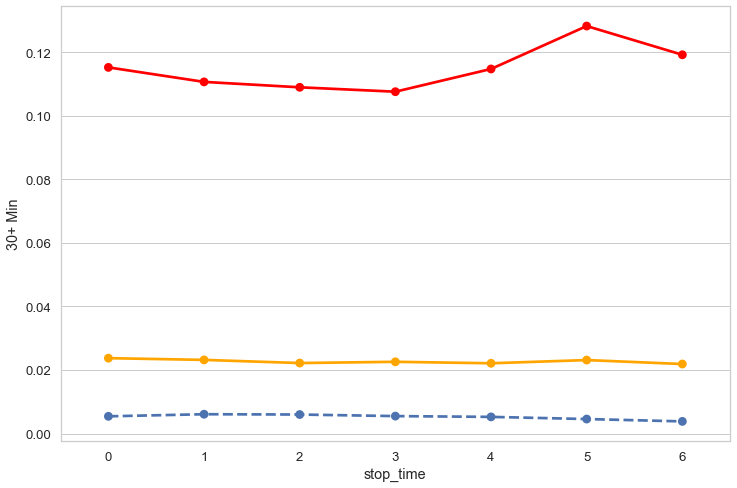

In [605]:
sns.pointplot(x = day_based.index, y= day_based["0-15 Min"], color="red")
sns.pointplot(x = day_based.index, y= day_based["16-30 Min"], color="orange")
sns.pointplot(x = day_based.index, y= day_based["30+ Min"], linestyles="--")

In [606]:
hour_based = pd.crosstab(ri.stop_time.dt.hour,ri.stop_duration, normalize=True)
hour_based

stop_duration,0-15 Min,16-30 Min,30+ Min
stop_time,,,
0,0.05,0.01,0.00
1,0.04,0.01,0.00
2,0.02,0.00,0.00
3,0.01,0.00,0.00
4,0.00,0.00,0.00
5,0.00,0.00,0.00
6,0.03,0.00,0.00
7,0.04,0.01,0.00
8,0.05,0.01,0.00


<AxesSubplot:xlabel='stop_time', ylabel='30+ Min'>

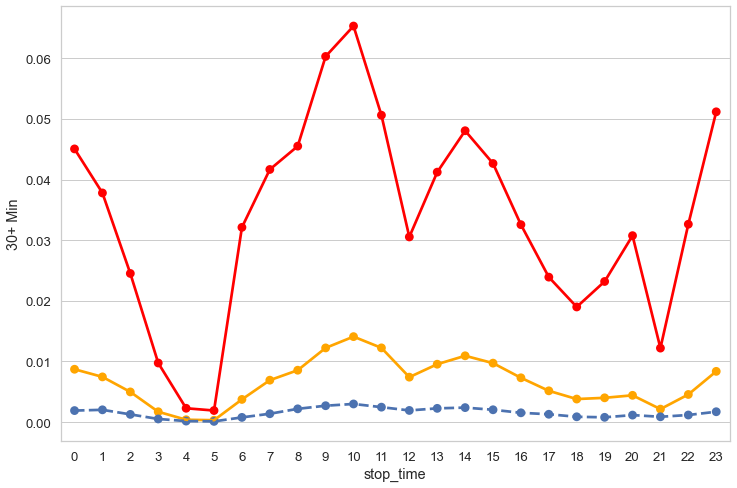

In [607]:
sns.pointplot(x = hour_based.index, y= hour_based["0-15 Min"], color="red")
sns.pointplot(x = hour_based.index, y= hour_based["16-30 Min"], color="orange")
sns.pointplot(x = hour_based.index, y= hour_based["30+ Min"], linestyles="--")

**It is seen that there is no difference when looking at the rates of the days of the week and the police stop times during the day.**

### Searching by violation

In [608]:
ri.groupby("stop_duration")["violation"].value_counts(normalize=True)

stop_duration  violation          
0-15 Min       Speeding              0.59
               Moving violation      0.17
               Equipment             0.13
               Seat belt             0.04
               Registration/plates   0.04
               Other                 0.04
16-30 Min      Speeding              0.50
               Moving violation      0.23
               Equipment             0.10
               Other                 0.09
               Registration/plates   0.06
               Seat belt             0.02
30+ Min        Moving violation      0.40
               Speeding              0.19
               Other                 0.19
               Equipment             0.15
               Registration/plates   0.06
               Seat belt             0.01
Name: violation, dtype: float64

In [609]:
ri.groupby("violation")["stop_duration"].value_counts(normalize=True)

violation            stop_duration
Equipment            0-15 Min        0.83
                     16-30 Min       0.13
                     30+ Min         0.04
Moving violation     0-15 Min        0.73
                     16-30 Min       0.20
                     30+ Min         0.08
Other                0-15 Min        0.58
                     16-30 Min       0.29
                     30+ Min         0.14
Registration/plates  0-15 Min        0.71
                     16-30 Min       0.23
                     30+ Min         0.06
Seat belt            0-15 Min        0.90
                     16-30 Min       0.09
                     30+ Min         0.01
Speeding             0-15 Min        0.85
                     16-30 Min       0.14
                     30+ Min         0.01
Name: stop_duration, dtype: float64

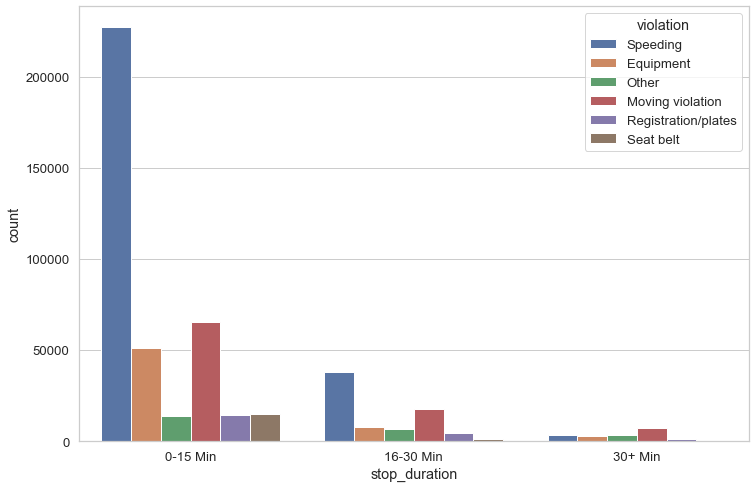

In [610]:
sns.countplot(x = "stop_duration", data=ri, hue="violation");

**Movement violations cover the majority (40%) of stop times greater than 30 minutes.**

### Searching by district

In [611]:
pd.crosstab(ri.stop_duration, ri.district, normalize=True)


district,Zone K1,Zone K2,Zone K3,Zone X1,Zone X3,Zone X4
stop_duration,,,,,,
0-15 Min,0.08,0.15,0.19,0.02,0.16,0.21
16-30 Min,0.02,0.04,0.03,0.01,0.03,0.04
30+ Min,0.00,0.01,0.01,0.01,0.00,0.01


In [612]:
ri.groupby("district")["stop_duration"].value_counts(normalize=True)

district  stop_duration
Zone K1   0-15 Min        0.81
          16-30 Min       0.17
          30+ Min         0.02
Zone K2   0-15 Min        0.75
          16-30 Min       0.20
          30+ Min         0.05
Zone K3   0-15 Min        0.84
          16-30 Min       0.12
          30+ Min         0.03
Zone X1   0-15 Min        0.62
          16-30 Min       0.20
          30+ Min         0.18
Zone X3   0-15 Min        0.85
          16-30 Min       0.14
          30+ Min         0.01
Zone X4   0-15 Min        0.80
          16-30 Min       0.16
          30+ Min         0.04
Name: stop_duration, dtype: float64

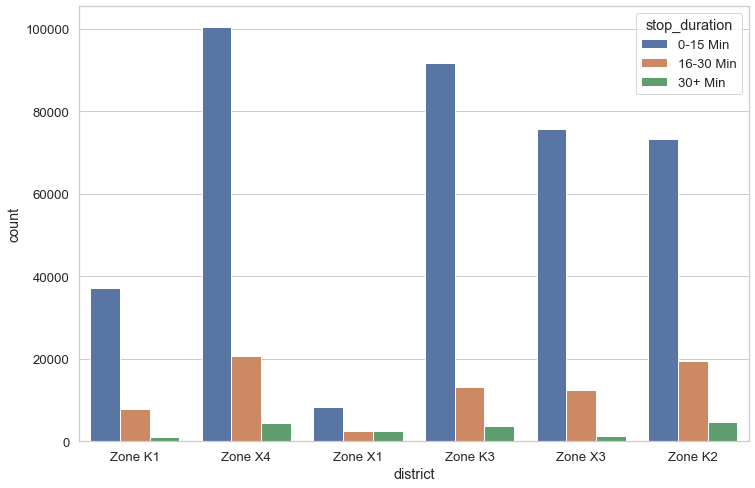

In [613]:
sns.countplot(x = "district", data=ri, hue="stop_duration");

**We can comment that the police stop times in Zone X1 and Zone K2 are longer than in other regions.**

# Questions

Good data analysis project is all about asking questions, in this notebook we are going to answer the following questions:
- Do men or women speed more often?
- Does gender affect who gets searched during a stop?
- During a search, how often is the driver frisked?
- Which year had the least number of stops?
- How does drug activity change by time of day?
- Do most stops occur at night?

## Question-1

Do men or women speed more often?

In [614]:
ri.groupby("violation")["driver_gender"].value_counts(normalize=True)

violation            driver_gender
Equipment            M               0.77
                     F               0.23
Moving violation     M               0.80
                     F               0.20
Other                M               0.84
                     F               0.16
Registration/plates  M               0.72
                     F               0.28
Seat belt            M               0.78
                     F               0.22
Speeding             M               0.68
                     F               0.32
Name: driver_gender, dtype: float64

In [615]:
ri.groupby("driver_gender")["violation"].value_counts(normalize=True)

driver_gender  violation          
F              Speeding              0.66
               Moving violation      0.14
               Equipment             0.11
               Registration/plates   0.04
               Other                 0.03
               Seat belt             0.03
M              Speeding              0.52
               Moving violation      0.21
               Equipment             0.14
               Other                 0.06
               Registration/plates   0.04
               Seat belt             0.04
Name: violation, dtype: float64

**Although the majority of those who make speeding violations are males, it is seen that females speed more than males in comparison of gender-based violations.**

## Question-2

Does gender affect who gets searched during a stop?

In [616]:
ri.groupby("driver_gender")["search_conducted"].value_counts(normalize=True)

driver_gender  search_conducted
F              False              0.98
               True               0.02
M              False              0.96
               True               0.04
Name: search_conducted, dtype: float64

**As can be seen, the rate of search for men is 2 times higher than for women.**

In [617]:
ri.groupby(["driver_gender","violation"])["search_conducted"].value_counts(normalize=True).to_frame(name="").unstack()


search_conducted                  False True
driver_gender violation                     
F             Equipment            0.96 0.04
              Moving violation     0.96 0.04
              Other                0.95 0.05
              Registration/plates  0.95 0.05
              Seat belt            0.98 0.02
              Speeding             0.99 0.01
M             Equipment            0.93 0.07
              Moving violation     0.94 0.06
              Other                0.95 0.05
              Registration/plates  0.90 0.10
              Seat belt            0.97 0.03
              Speeding             0.97 0.03

**When we look at the distribution according to the violations, it is seen that the rate of men is higher.**

## Question-3

During a search, how often is the driver frisked?

In [618]:
ri[ri["search_conducted"] == True]["frisk"].value_counts(normalize=True)

False   0.91
True    0.09
Name: frisk, dtype: float64

<AxesSubplot:ylabel='frisk'>

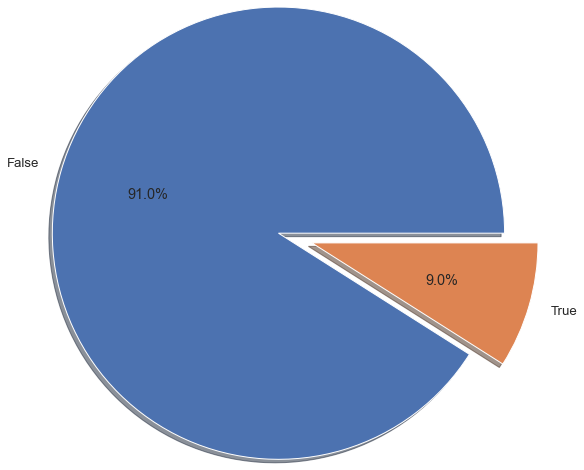

In [619]:
ri[ri["search_conducted"] == True]["frisk"].value_counts(normalize=True).plot.pie(explode=[0.2,0], radius=1.3, shadow=True, autopct="%.1f%%")

**Protective frisked was made in 9% of those who were searched.**

## Question-4

Which year had the least number of stops?

In [620]:
ri["stop_time"].dt.year.value_counts(ascending=True)

2005    13810
2010    39443
2009    39821
2013    41922
2011    42635
2015    45206
2008    45572
2014    48880
2007    50139
2006    55554
2012    57626
Name: stop_time, dtype: int64

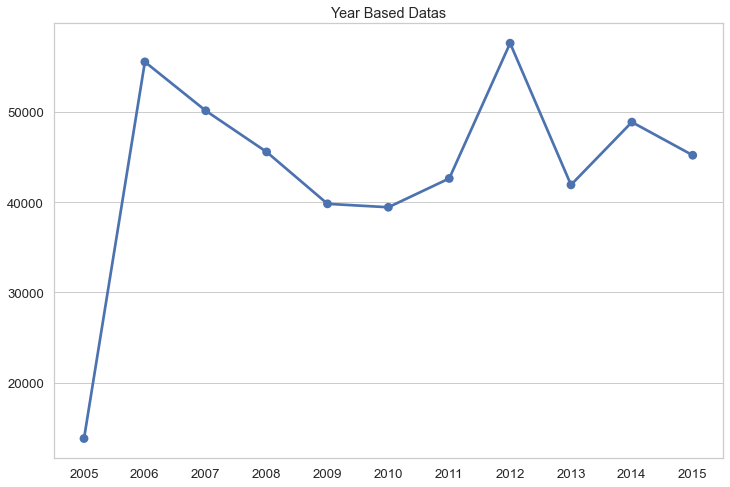

In [621]:
sns.pointplot(x=ri["stop_time"].dt.year.value_counts(ascending=False).index, 
              y=ri["stop_time"].dt.year.value_counts(ascending=False).values).set_title("Year Based Datas");

**2005 is the year with the least number of stop.**

## Question-5

How does drug activity change by time of day?

In [622]:
ri.groupby(ri["stop_time"].dt.hour)["drugs_related_stop"].value_counts().to_frame().unstack().iloc[:,[1]]

,drugs_related_stop
drugs_related_stop,True
stop_time,
0,572
1,433
2,238
3,118
4,17
5,6
6,31
7,57


<AxesSubplot:xlabel='stop_time'>

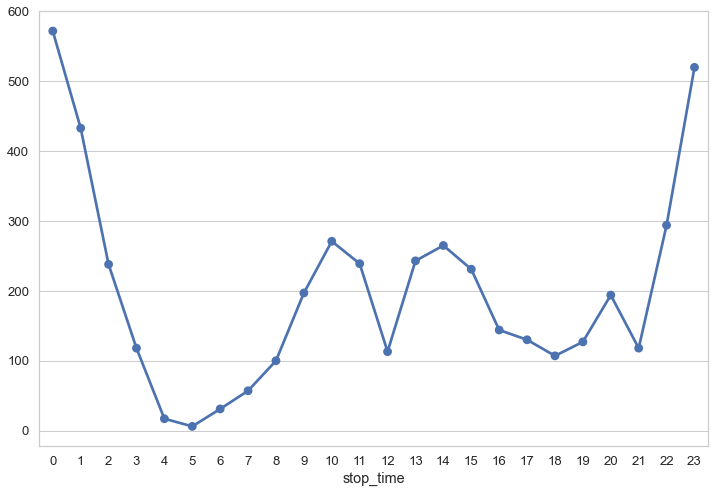

In [623]:
sns.pointplot(x=ri.groupby(ri["stop_time"].dt.hour)["drugs_related_stop"].value_counts().to_frame().unstack().iloc[:,[1]].index, 
              y=ri.groupby(ri["stop_time"].dt.hour)["drugs_related_stop"].value_counts().values[1::2] )

**It is observed that drug activity increases at 23 and 24 at night, and decreases at 5 and 6 in the morning.**

## Question 6
- Do most stops occur at night?

<AxesSubplot:>

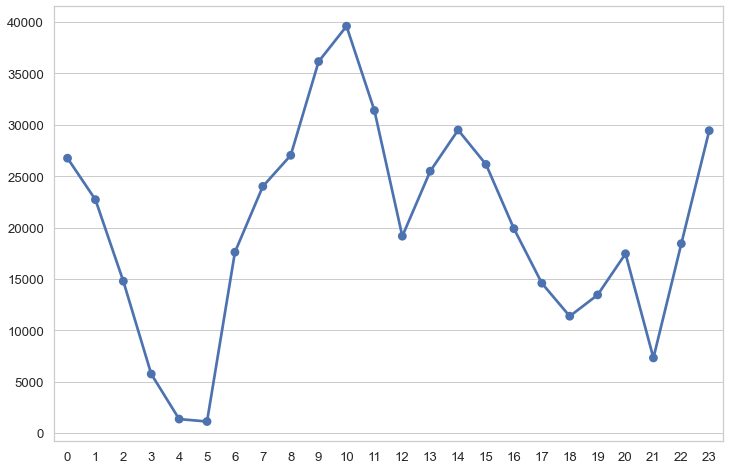

In [624]:
sns.pointplot(x=ri["stop_time"].dt.hour.value_counts(ascending=False).index, 
              y=ri["stop_time"].dt.hour.value_counts(ascending=False).values)

**It is seen that most of the stops are in the morning hours (around 10-11).**

This is the end of my analysis. We end up making conclusions about various topics. It was a great experince for me and also I really enjoyed it. I hope you enjoyed it too.


# **THE END**